In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

df = sns.load_dataset("titanic")
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 1. groupby를 사용해서 다음의 결과가 나오도록 구해보세요.
* embark_town 별로 평균 fare(운임요금)을 구합니다.
```
embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.079812
Name: fare, dtype: float64
```

In [2]:
df.groupby(["embark_town"])["fare"].mean()

embark_town
Cherbourg      59.954144
Queenstown     13.276030
Southampton    27.079812
Name: fare, dtype: float64

## 2. groupby를 사용해서 deck 별로 운임요금의 "count", "mean", "sum" 값을 구합니다.
* agg 를 사용해서 구할 수 있습니다. 아래의 결과가 나오도록 합니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>sum</th>
    </tr>
    <tr>
      <th>deck</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>A</th>
      <td>15</td>
      <td>39.623887</td>
      <td>594.3583</td>
    </tr>
    <tr>
      <th>B</th>
      <td>47</td>
      <td>113.505764</td>
      <td>5334.7709</td>
    </tr>
    <tr>
      <th>C</th>
      <td>59</td>
      <td>100.151341</td>
      <td>5908.9291</td>
    </tr>
    <tr>
      <th>D</th>
      <td>33</td>
      <td>57.244576</td>
      <td>1889.0710</td>
    </tr>
    <tr>
      <th>E</th>
      <td>32</td>
      <td>46.026694</td>
      <td>1472.8542</td>
    </tr>
    <tr>
      <th>F</th>
      <td>13</td>
      <td>18.696792</td>
      <td>243.0583</td>
    </tr>
    <tr>
      <th>G</th>
      <td>4</td>
      <td>13.581250</td>
      <td>54.3250</td>
    </tr>
  </tbody>
</table>

In [3]:
df.groupby(["deck"])["fare"].agg(["count", "mean", "sum"])

,count,mean,sum
deck,,,
A,15,39.623887,594.3583
B,47,113.505764,5334.7709
C,59,100.151341,5908.9291
D,33,57.244576,1889.0710
E,32,46.026694,1472.8542
F,13,18.696792,243.0583
G,4,13.581250,54.3250


## 3. groupby를 사용해서 "class", "who" 를 인덱스로 "age" 값의 평균, "fare"의 평균, "deck" 의 "count" 값을 구해주세요.
* 아래의 결과가 나오도록 합니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>age</th>
      <th>fare</th>
      <th>deck</th>
    </tr>
    <tr>
      <th>class</th>
      <th>who</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">First</th>
      <th>child</th>
      <td>7.820000</td>
      <td>139.382633</td>
      <td>6</td>
    </tr>
    <tr>
      <th>man</th>
      <td>42.382653</td>
      <td>65.951086</td>
      <td>91</td>
    </tr>
    <tr>
      <th>woman</th>
      <td>35.500000</td>
      <td>104.317995</td>
      <td>78</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Second</th>
      <th>child</th>
      <td>4.543684</td>
      <td>28.323905</td>
      <td>4</td>
    </tr>
    <tr>
      <th>man</th>
      <td>33.588889</td>
      <td>19.054124</td>
      <td>3</td>
    </tr>
    <tr>
      <th>woman</th>
      <td>32.179688</td>
      <td>20.868624</td>
      <td>9</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Third</th>
      <th>child</th>
      <td>6.817586</td>
      <td>23.220190</td>
      <td>3</td>
    </tr>
    <tr>
      <th>man</th>
      <td>28.995556</td>
      <td>11.340213</td>
      <td>5</td>
    </tr>
    <tr>
      <th>woman</th>
      <td>27.854167</td>
      <td>15.354351</td>
      <td>4</td>
    </tr>
  </tbody>
</table>

In [4]:
df.groupby(["class", "who"]).agg({"age": "mean", "fare": "mean", "deck":"count"})

age        fare  deck
class  who                               
First  child   7.820000  139.382633     6
       man    42.382653   65.951086    91
       woman  35.500000  104.317995    78
Second child   4.543684   28.323905     4
       man    33.588889   19.054124     3
       woman  32.179688   20.868624     9
Third  child   6.817586   23.220190     3
       man    28.995556   11.340213     5
       woman  27.854167   15.354351     4

## 4. groupby를 사용해서 class, who 를 인덱스로 하고 "fare" 의 describe 값을 구해서 다음의 결과가 나오도록 합니다.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>count</th>
      <th>mean</th>
      <th>std</th>
      <th>min</th>
      <th>25%</th>
      <th>50%</th>
      <th>75%</th>
      <th>max</th>
    </tr>
    <tr>
      <th>class</th>
      <th>who</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">First</th>
      <th>child</th>
      <td>6.0</td>
      <td>139.382633</td>
      <td>43.666954</td>
      <td>81.8583</td>
      <td>120.000000</td>
      <td>135.7750</td>
      <td>151.55000</td>
      <td>211.3375</td>
    </tr>
    <tr>
      <th>man</th>
      <td>119.0</td>
      <td>65.951086</td>
      <td>77.969681</td>
      <td>0.0000</td>
      <td>27.720800</td>
      <td>39.6000</td>
      <td>77.00835</td>
      <td>512.3292</td>
    </tr>
    <tr>
      <th>woman</th>
      <td>91.0</td>
      <td>104.317995</td>
      <td>74.478185</td>
      <td>25.9292</td>
      <td>56.964600</td>
      <td>80.0000</td>
      <td>134.07500</td>
      <td>512.3292</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Second</th>
      <th>child</th>
      <td>19.0</td>
      <td>28.323905</td>
      <td>7.750054</td>
      <td>14.5000</td>
      <td>24.500000</td>
      <td>26.2500</td>
      <td>34.87500</td>
      <td>41.5792</td>
    </tr>
    <tr>
      <th>man</th>
      <td>99.0</td>
      <td>19.054124</td>
      <td>15.195182</td>
      <td>0.0000</td>
      <td>11.500000</td>
      <td>13.0000</td>
      <td>26.00000</td>
      <td>73.5000</td>
    </tr>
    <tr>
      <th>woman</th>
      <td>66.0</td>
      <td>20.868624</td>
      <td>10.997907</td>
      <td>10.5000</td>
      <td>13.000000</td>
      <td>19.1250</td>
      <td>26.00000</td>
      <td>65.0000</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">Third</th>
      <th>child</th>
      <td>58.0</td>
      <td>23.220190</td>
      <td>11.365095</td>
      <td>7.2250</td>
      <td>13.676075</td>
      <td>21.0750</td>
      <td>31.27500</td>
      <td>46.9000</td>
    </tr>
    <tr>
      <th>man</th>
      <td>319.0</td>
      <td>11.340213</td>
      <td>10.661605</td>
      <td>0.0000</td>
      <td>7.750000</td>
      <td>7.8958</td>
      <td>8.66250</td>
      <td>69.5500</td>
    </tr>
    <tr>
      <th>woman</th>
      <td>114.0</td>
      <td>15.354351</td>
      <td>12.308990</td>
      <td>6.7500</td>
      <td>7.775000</td>
      <td>9.8250</td>
      <td>17.70000</td>
      <td>69.5500</td>
    </tr>
  </tbody>
</table>

In [5]:
df.groupby(["class", "who"])["fare"].describe()

count        mean        std      min         25%       50%  \
class  who                                                                  
First  child    6.0  139.382633  43.666954  81.8583  120.000000  135.7750   
       man    119.0   65.951086  77.969681   0.0000   27.720800   39.6000   
       woman   91.0  104.317995  74.478185  25.9292   56.964600   80.0000   
Second child   19.0   28.323905   7.750054  14.5000   24.500000   26.2500   
       man     99.0   19.054124  15.195182   0.0000   11.500000   13.0000   
       woman   66.0   20.868624  10.997907  10.5000   13.000000   19.1250   
Third  child   58.0   23.220190  11.365095   7.2250   13.676075   21.0750   
       man    319.0   11.340213  10.661605   0.0000    7.750000    7.8958   
       woman  114.0   15.354351  12.308990   6.7500    7.775000    9.8250   

                    75%       max  
class  who                         
First  child  151.55000  211.3375  
       man     77.00835  512.3292  
       woman  134.07500  512.3292  
Second child   34.87500   41.5792  
       man     26.00000   73.5000  
       woman   26.00000   65.0000  
Third  child   31.27500   46.9000  
       man      8.66250   69.5500  
       woman   17.70000   69.5500

## 5. pivot_table 을 사용해서 alive(생존여부) 별로 age의 평균 값을 구합니다.
* 아래의 결과가 나오도록 합니다.
* 생존여부에 따른 평균 나이를 구합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>age</th>
    </tr>
    <tr>
      <th>alive</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>no</th>
      <td>30.626179</td>
    </tr>
    <tr>
      <th>yes</th>
      <td>28.343690</td>
    </tr>
  </tbody>
</table>

In [6]:
df.pivot_table(index="alive", values="age")

,age
alive,
no,30.626179
yes,28.343690


## 6. pivot_table 을 사용해서 "alive", "class" 별로 평균 fare(운임요금)을 구합니다.
* 아래의 결과가 나오도록 합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>fare</th>
    </tr>
    <tr>
      <th>alive</th>
      <th>class</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="3" valign="top">no</th>
      <th>First</th>
      <td>64.684008</td>
    </tr>
    <tr>
      <th>Second</th>
      <td>19.412328</td>
    </tr>
    <tr>
      <th>Third</th>
      <td>13.669364</td>
    </tr>
    <tr>
      <th rowspan="3" valign="top">yes</th>
      <th>First</th>
      <td>95.608029</td>
    </tr>
    <tr>
      <th>Second</th>
      <td>22.055700</td>
    </tr>
    <tr>
      <th>Third</th>
      <td>13.694887</td>
    </tr>
  </tbody>
</table>

In [7]:
df.pivot_table(index=["alive", "class"], values="fare")

fare
alive class            
no    First   64.684008
      Second  19.412328
      Third   13.669364
yes   First   95.608029
      Second  22.055700
      Third   13.694887

## 7. pclass 가 1이고 fare가 100 보다 큰 승객 나이의 평균값을 구해주세요.
* 결과는 다음의 값이 나옵니다.
`31.956666666666667`

In [8]:
df.loc[(df["fare"] > 100) & df["pclass"] == 1, "age"].mean()

31.956666666666667

## 8.groupby 로 deck 별 평균 fare를 구하고 높은 순으로 정렬해 주세요.
* 다음과 결과가 나오도록 합니다.
```
deck
B    113.505764
C    100.151341
D     57.244576
E     46.026694
A     39.623887
F     18.696792
G     13.581250
Name: fare, dtype: float64
```

In [9]:
df.groupby("deck")["fare"].mean().sort_values(ascending=False)

deck
B    113.505764
C    100.151341
D     57.244576
E     46.026694
A     39.623887
F     18.696792
G     13.581250
Name: fare, dtype: float64

## 9. 다음의 결과가 나오도록 서브셋을 만드세요.
* 나이가 60 보다 크도 embarked 가  "C"인 승객의 "pclass", "fare", "age", "embarked", "alone" 정보만 따로 구해보세요.
* 아래의 결과가 나오도록 합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pclass</th>
      <th>fare</th>
      <th>age</th>
      <th>embarked</th>
      <th>alone</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>54</th>
      <td>1</td>
      <td>61.9792</td>
      <td>65.0</td>
      <td>C</td>
      <td>False</td>
    </tr>
    <tr>
      <th>96</th>
      <td>1</td>
      <td>34.6542</td>
      <td>71.0</td>
      <td>C</td>
      <td>True</td>
    </tr>
    <tr>
      <th>493</th>
      <td>1</td>
      <td>49.5042</td>
      <td>71.0</td>
      <td>C</td>
      <td>True</td>
    </tr>
  </tbody>
</table>

In [10]:
df.loc[(df["age"] > 60) & (df["embarked"] == "C"), 
       ["pclass", "fare", "age", "embarked", "alone"]]

,pclass,fare,age,embarked,alone
54,1,61.9792,65.0,C,False
96,1,34.6542,71.0,C,True
493,1,49.5042,71.0,C,True


## 10. class 별로 countplot 을 그리고 alive(생존여부)에 따라 색상을 다르게 표현해 주세요.

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAEGCAYAAACKB4k+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0
dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAYvElEQVR4nO3df5BU5Z3v8fcnQEQjkYgTFxl0UMlu
RGSU0WhMsixmr4Rkwc1FRmpFE81iou6Sql2vxuVGTcVbJpq11BhTpDSgIfxQ44XrNWzQ+Csm0cyw
/NZcUcw6ZFTAiD8SVMbv/aMfDh0YoIE5fWamP6+qrjn9nOd0f9uW+czznF+KCMzMzADeV3QBZmbW
fTgUzMws41AwM7OMQ8HMzDIOBTMzy/QtuoD9cdhhh0VDQ0PRZZiZ9Sitra0bI6Kus3U9OhQaGhpo
aWkpugwzsx5F0u92tc7TR2ZmlnEomJlZxqFgZmaZHr1PoTPvvvsubW1tbNmypehS9kv//v2pr6+n
X79+RZdiZjWk14VCW1sbAwYMoKGhAUlFl7NPIoJNmzbR1tbGsGHDii7HzGpIr5s+2rJlC4MGDeqx
gQAgiUGDBvX40Y6Z9Ty9LhSAHh0I2/SGz2BmPU+vDAUzM9s3DoV9tGjRIq677rouea2DDz64S17H
zGx/9bodzV1p69at9O3b+X+iCRMmMGHChCpXZNYzjb7szqJL2Cut159XdAmFqYmRwltvvcVnP/tZ
Ro0axfHHH8/8+fNpaGhg48aNALS0tDBmzBgArr76aqZOncrpp5/O1KlTOfXUU1m9enX2WmPGjKGl
pYVZs2Zx6aWXsnnzZo466ijee++97L2GDh3Ku+++y3PPPce4ceMYPXo0n/zkJ3nmmWcAWLduHaed
dhojR45kxowZ1f2PYWa2GzURCosXL+aII45g+fLlrFq1inHjxu22/5o1a3jwwQeZO3cuzc3NLFiw
AID29nba29tpamrK+h5yyCE0Njby6KOPAnD//fdz5pln0q9fP6ZNm8Ytt9xCa2srN9xwAxdffDEA
06dP5ytf+QorV65k8ODBOX1qM7O9VxOhMHLkSJYsWcLll1/O448/ziGHHLLb/hMmTODAAw8EYPLk
ydxzzz0ALFiwgEmTJu3Uv7m5mfnz5wMwb948mpubefPNN/nlL3/J2WefTWNjIxdddBHt7e0APPHE
E0yZMgWAqVOndtnnNDPbXzWxT+EjH/kIS5cu5YEHHmDGjBmcccYZ9O3bN5vy2fF8gA984APZ8pAh
Qxg0aBArVqxg/vz5fP/739/p9SdMmMCVV17Jq6++SmtrK2PHjuWtt95i4MCBLFu2rNOafMipmXVH
NTFS+P3vf89BBx3Eueeey2WXXcbSpUtpaGigtbUVgHvvvXe32zc3N/Ptb3+bzZs3c8IJJ+y0/uCD
D+bkk09m+vTpfO5zn6NPnz588IMfZNiwYdx9991A6Szl5cuXA3D66aczb948AObMmdOVH9XMbL/U
RCisXLmSU045hcbGRq655hpmzJjBVVddxfTp02lqaqJPnz673X7SpEnMmzePyZMn77JPc3MzP/rR
j2hubs7a5syZw+23386oUaMYMWIECxcuBOCmm27i1ltvZeTIkaxfv75rPqSZWRdQRBRdwz5ramqK
HW+y8/TTT/PRj360oIq6Vm/6LFbbfEhq9yKpNSKaOltXEyMFMzOrTG6hIKm/pKckLZe0WtI1qX2W
pHWSlqVHY2qXpJslrZW0QtJJedVmZmady/Poo7eBsRHxpqR+wC8k/TStuywi7tmh/2eA4enxMeC2
9NPMzKokt5FClLyZnvZLj93twJgI3Jm2+zUwUJLP7DIzq6Jc9ylI6iNpGfAKsCQinkyrrk1TRDdK
OiC1DQFeLNu8LbXt+JrTJLVIatmwYUOe5ZuZ1ZxcQyEiOiKiEagHTpF0PPA14K+Ak4FDgcv38jVn
RkRTRDTV1dV1ec1mZrWsKmc0R8Rrkh4GxkXEDan5bUk/BP41PV8PDC3brD61damuPjSu0kPXFi9e
zPTp0+no6OBLX/oSV1xxRZfWYWbWFfI8+qhO0sC0fCDwt8Az2/YTqHSdh7OAVWmTRcB56SikU4HN
EdGeV33V1NHRwSWXXMJPf/pT1qxZw9y5c1mzZk3RZZmZ7STPkcJgYLakPpTCZ0FE3C/p55LqAAHL
gC+n/g8A44G1wB+BL+ZYW1U99dRTHHvssRx99NEAnHPOOSxcuJDjjjuu4MrMzP5cbqEQESuAEztp
H7uL/gFcklc9RVq/fj1Dh26fGauvr+fJJ5/czRZmZsXwGc1mZpZxKFTBkCFDePHF7UfbtrW1MWTI
TkfbmpkVzqFQBSeffDLPPvss69at45133mHevHm+v7OZdUs1cZOdckVc/bBv375897vf5cwzz6Sj
o4MLLriAESNGVL0OM7M9qblQKMr48eMZP3580WWYme2Wp4/MzCzjUDAzs4xDwczMMg4FMzPLOBTM
zCzjUDAzs0zNHZL6X98Y2aWvd+TXV1bU74ILLuD+++/nwx/+MKtWrdrzBmZmBfBIoUq+8IUvsHjx
4qLLMDPbLYdClXzqU5/i0EMPLboMM7PdciiYmVnGoWBmZhmHgpmZZRwKZmaWqblDUis9hLSrTZky
hUceeYSNGzdSX1/PNddcw4UXXlhILWZmu5JbKEjqDzwGHJDe556IuErSMGAeMAhoBaZGxDuSDgDu
BEYDm4DmiHghr/qqbe7cuUWXYGa2R3lOH70NjI2IUUAjME7SqcC3gBsj4ljgD8C2P5cvBP6Q2m9M
/czMrIpyC4UoeTM97ZceAYwF7knts4Gz0vLE9Jy0/gxJyqs+MzPbWa47miX1kbQMeAVYAjwHvBYR
W1OXNmDbHeyHAC8CpPWbKU0x7fia0yS1SGrZsGFDp+8bEV36OYrQGz6DmfU8uYZCRHRERCNQD5wC
/FUXvObMiGiKiKa6urqd1vfv359Nmzb16F+qEcGmTZvo379/0aWYWY2pytFHEfGapIeB04CBkvqm
0UA9sD51Ww8MBdok9QUOobTDea/U19fT1tbGrkYRPUX//v2pr68vugwzqzF5Hn1UB7ybAuFA4G8p
7Tx+GJhE6Qik84GFaZNF6fmv0vqfxz78ud+vXz+GDRvWBZ/AzKz25DlSGAzMltSH0jTVgoi4X9Ia
YJ6kbwL/Cdye+t8O3CVpLfAqcE6OtZmZWSdyC4WIWAGc2En785T2L+zYvgU4O696zMxsz3yZCzMz
yzgUzMws41AwM7OMQ8HMzDIOBTMzyzgUzMws41AwM7OMQ8HMzDIOBTMzyzgUzMws41AwM7OMQ8HM
zDIOBTMzyzgUzMws41AwM7OMQ8HMzDIOBTMzyzgUzMwsk1soSBoq6WFJayStljQ9tV8tab2kZekx
vmybr0laK+m3ks7MqzYzM+tcbvdoBrYC/xIRSyUNAFolLUnrboyIG8o7SzoOOAcYARwBPCjpIxHR
kWONZmZWJreRQkS0R8TStPwG8DQwZDebTATmRcTbEbEOWAuckld9Zma2s6rsU5DUAJwIPJmaLpW0
QtIdkj6U2oYAL5Zt1sbuQ8TMzLpY7qEg6WDgXuCrEfE6cBtwDNAItAPf2cvXmyapRVLLhg0burxe
M7NalmsoSOpHKRDmRMRPACLi5YjoiIj3gB+wfYpoPTC0bPP61PZnImJmRDRFRFNdXV2e5ZuZ1Zw8
jz4ScDvwdET8e1n74LJufw+sSsuLgHMkHSBpGDAceCqv+szMbGd5Hn10OjAVWClpWWq7EpgiqREI
4AXgIoCIWC1pAbCG0pFLl/jIIzOz6sotFCLiF4A6WfXAbra5Frg2r5rMzGz3fEazmZllHApmZpZx
KJiZWcahYGZmGYeCmZllHApmZpZxKJiZWcahYGZmGYeCmZllHApmZpZxKJiZWcahYGZmGYeCmZll
HApmZpapKBQkPVRJm5mZ9Wy7vZ+CpP7AQcBhkj7E9vsjfBAYknNtZmZWZXu6yc5FwFeBI4BWtofC
68B3c6zLzMwKsNtQiIibgJsk/VNE3FKlmszMrCAV3Y4zIm6R9HGgoXybiLgzp7rMzKwAle5ovgu4
AfgEcHJ6NO1hm6GSHpa0RtJqSdNT+6GSlkh6Nv38UGqXpJslrZW0QtJJ+/XJzMxsr1U0UqAUAMdF
ROzFa28F/iUilkoaALRKWgJ8AXgoIq6TdAVwBXA58BlgeHp8DLgt/TQzsyqp9DyFVcBf7M0LR0R7
RCxNy28AT1M6YmkiMDt1mw2clZYnAndGya+BgZIG7817mpnZ/ql0pHAYsEbSU8Db2xojYkIlG0tq
AE4EngQOj4j2tOol4PC0PAR4sWyzttTWXtaGpGnANIAjjzyywvLNzKwSlYbC1fv6BpIOBu4FvhoR
r0vK1kVESNqbKSkiYiYwE6CpqWmvtjUzs92r9OijR/flxSX1oxQIcyLiJ6n5ZUmDI6I9TQ+9ktrX
A0PLNq9PbWZmViWVHn30hqTX02OLpA5Jr+9hGwG3A09HxL+XrVoEnJ+WzwcWlrWfl45COhXYXDbN
ZGZmVVDpSGHAtuX0y34icOoeNjsdmAqslLQstV0JXAcskHQh8Dtgclr3ADAeWAv8EfhihZ/BzMy6
SKX7FDLpsNT/LekqSoeT7qrfL9h+WYwdnbGL171kb+sxM7OuU1EoSPp82dP3UTpvYUsuFZmZWWEq
HSn8XdnyVuAFSlNIZmbWi1S6T8Hz+2ZmNaDSo4/qJd0n6ZX0uFdSfd7FmZlZdVV6mYsfUjpk9Ij0
+D+pzczMepFKQ6EuIn4YEVvTYxZQl2NdZmZWgEpDYZOkcyX1SY9zgU15FmZmZtVXaShcQOkks5co
XaBuEqVLYJuZWS9S6SGp3wDOj4g/QOlGOZRuunNBXoWZmVn1VTpSOGFbIABExKuULoVtZma9SKWh
8L5tt82EbKSw15fIMDOz7q3SX+zfAX4l6e70/Gzg2nxKMjOzolR6RvOdklqAsanp8xGxJr+yzMys
CBVPAaUQcBCYmfVile5TMDOzGuBQMDOzjEPBzMwyDgUzM8s4FMzMLJNbKEi6I917YVVZ29WS1kta
lh7jy9Z9TdJaSb+VdGZedZmZ2a7lOVKYBYzrpP3GiGhMjwcAJB0HnAOMSNt8T1KfHGszM7NO5BYK
EfEY8GqF3ScC8yLi7YhYB6wFTsmrNjMz61wR+xQulbQiTS9tu57SEODFsj5tqW0nkqZJapHUsmHD
hrxrNTOrKdUOhduAY4BGSvdl+M7evkBEzIyIpohoqqvzzd/MzLpSVUMhIl6OiI6IeA/4AduniNYD
Q8u61qc2MzOroqqGgqTBZU//Hth2ZNIi4BxJB0gaBgwHnqpmbWZmluM9ESTNBcYAh0lqA64Cxkhq
BAJ4AbgIICJWS1pA6YJ7W4FLIqIjr9rMzKxzuYVCREzppPn23fS/Ft+jwcysUD6j2czMMg4FMzPL
+D7L3dh/fWNk0SXstSO/vrLoEsxsP3ikYGZmGYeCmZllHApmZpZxKJiZWcahYGZmGYeCmZllHApm
ZpZxKJiZWcahYGZmGZ/RbGa2g1q+moBHCmZmlnEomJlZxqFgZmYZh4KZmWUcCmZmlnEomJlZJrdQ
kHSHpFckrSprO1TSEknPpp8fSu2SdLOktZJWSDopr7rMzGzX8hwpzALG7dB2BfBQRAwHHkrPAT4D
DE+PacBtOdZlZma7kFsoRMRjwKs7NE8EZqfl2cBZZe13RsmvgYGSBudVm5mZda7a+xQOj4j2tPwS
cHhaHgK8WNavLbXtRNI0SS2SWjZs2JBfpWZmNaiwHc0REUDsw3YzI6IpIprq6upyqMzMrHZV+9pH
L0saHBHtaXroldS+Hhha1q8+tZkBMPqyO4suYa+1Xn9e0SWY7bVqjxQWAeen5fOBhWXt56WjkE4F
NpdNM5mZWZXkNlKQNBcYAxwmqQ24CrgOWCDpQuB3wOTU/QFgPLAW+CPwxbzqMjOzXcstFCJiyi5W
ndFJ3wAuyasWMzOrjM9oNjOzjG+yY5aTnnajlq66SYv1bB4pmJlZxqFgZmYZh4KZmWVqZp9CTzz5
6b4BRVdgZrXGIwUzM8s4FMzMLONQMDOzjEPBzMwyDgUzM8s4FMzMLONQMDOzjEPBzMwyDgUzM8s4
FMzMLONQMDOzjEPBzMwyDgUzM8sUcpVUSS8AbwAdwNaIaJJ0KDAfaABeACZHxB+KqM/MrFYVOVL4
m4hojIim9PwK4KGIGA48lJ6bmVkVdafpo4nA7LQ8GzirwFrMzGpSUaEQwM8ktUqaltoOj4j2tPwS
cHhnG0qaJqlFUsuGDRuqUauZWc0o6s5rn4iI9ZI+DCyR9Ez5yogISdHZhhExE5gJ0NTU1GkfMzPb
N4WMFCJiffr5CnAfcArwsqTBAOnnK0XUZmZWy6oeCpI+IGnAtmXgvwGrgEXA+anb+cDCatdmZlbr
ipg+Ohy4T9K29/9xRCyW9BtggaQLgd8BkwuozcysplU9FCLieWBUJ+2bgDOqXY+ZmW3XnQ5JNTOz
gjkUzMws41AwM7OMQ8HMzDIOBTMzyzgUzMws41AwM7OMQ8HMzDIOBTMzyzgUzMws41AwM7OMQ8HM
zDIOBTMzyzgUzMws41AwM7OMQ8HMzDIOBTMzyzgUzMws41AwM7NMtwsFSeMk/VbSWklXFF2PmVkt
6VahIKkPcCvwGeA4YIqk44qtysysdnSrUABOAdZGxPMR8Q4wD5hYcE1mZjVDEVF0DRlJk4BxEfGl
9Hwq8LGIuLSszzRgWnr6l8Bvq15o9RwGbCy6CNtn/v56rt7+3R0VEXWdrehb7Ur2V0TMBGYWXUc1
SGqJiKai67B94++v56rl7667TR+tB4aWPa9PbWZmVgXdLRR+AwyXNEzS+4FzgEUF12RmVjO61fRR
RGyVdCnwH0Af4I6IWF1wWUWqiWmyXszfX89Vs99dt9rRbGZmxepu00dmZlYgh4KZmWUcCgWQ1CFp
WdmjQVKTpJv34jUGSro4zzprmaR/k7Ra0or0HX2syu8/RtL91XzP3krSoLJ/ay9JWp+WX5O0Zhfb
fEPSpyt47QZJq7q+6uJ0qx3NNeRPEdG4Q9sLQMuOHSX1jYitnbzGQOBi4HtdX15tk3Qa8DngpIh4
W9JhwPsLLsv2UURsAhoBJF0NvBkRN0hqADoN3oj4emftkvpEREc+lXYPHil0E+V/GUq6WtJdkp4A
7pI0QtJT6a+bFZKGA9cBx6S26wstvvcZDGyMiLcBImJjRPxe0mhJj0pqlfQfkgYDSDpW0oOSlkta
KukYlVwvaZWklZKaU98xkh6RdI+kZyTNkaS0blxqWwp8vqgPX2P6SPpBGhX+TNKBAJJmpSssIOkF
Sd9K38vZ6f+D5ZKWA5cUWXweHArFOLBsOHvfLvocB3w6IqYAXwZuSqOLJqANuAJ4LiIaI+Ky6pRd
M34GDJX0/yR9T9JfS+oH3AJMiojRwB3Atan/HODWiBgFfBxop/RLvREYBXwauH5biAAnAl+l9B0f
DZwuqT/wA+DvgNHAX1ThcxoMp/TdjQBeA/77LvptioiTImIe8EPgn9L33et4+qgYnU0f7WhRRPwp
Lf8K+DdJ9cBPIuLZ9Mel5SAi3pQ0Gvgk8DfAfOCbwPHAkvTfvg/QLmkAMCQi7kvbbgGQ9Algbppq
eFnSo8DJwOvAUxHRlvotAxqAN4F1EfFsav8R26/xZflZFxHL0nIrpe+iM/OhtC8PGBgRj6X2uyhd
1bnXcCh0X29tW4iIH0t6Evgs8ICki4DnC6usBqRf5o8Aj0haSWmaYHVEnFbeL4XC3nq7bLkD/zss
0o7fxYG76PfWLtp7HU8f9QCSjgaej4ibgYXACcAbwL78QrI9kPSXab/NNo3A00Bd2gmNpH6SRkTE
G0CbpLNS+wGSDgIeB5ol9ZFUB3wKeGo3b/sM0CDpmPR8Shd/LOsCEfEa8FoaCQL8Q5H15MGh0DNM
BlalqYbjgTvTERVPpB2Z3tHctQ4GZktaI2kFpbn/rwOTgG+lHYzLKO0/AJgK/HPq+0tK+wPuA1YA
y4GfA/8jIl7a1RumaadpwP9NOzRfyeWTWVf4InBr+vfY6+ZxfZkLMzPLeKRgZmYZh4KZmWUcCmZm
lnEomJlZxqFgZmYZh4LZfkjXqfrXousw6yoOBTMzyzgUzPaCpPPSlWqXS7prh3X/KOk3ad296cxm
JJ2dTjJcLumx1NbZlW/NCueT18wqJGkEpTOVPx4RGyUdCvwz26/PPyidaY6kbwIvR8Qt6dpJ4yJi
vaSBEfGapFuAX0fEHEnvB/qUXQDRrDAeKZhVbixwd0RsBIiIV3dYf7ykx1MI/AMwIrU/AcyS9I+U
rq4KpSvfXinpcuAoB4J1Fw4Fs64zC7g0IkYC1wD9ASLiy8AMYCjQmkYUPwYmAH+idOXbscWUbPbn
HApmlfs5pTtvDQJI00flBlC6x0I/yq6eKemYiHgy3eJxA6Ub+HR25Vuzwvk67mYViojVkq4FHpXU
AfwnpXtrb/M/gScp/eJ/ku2XNr8+7UgW8BClK6deDkyV9C7wEvC/qvIhzPbAO5rNzCzj6SMzM8s4
FMzMLONQMDOzjEPBzMwyDgUzM8s4FMzMLONQMDOzzP8H3RkP1Z2Tx80AAAAASUVORK5CYII=
">

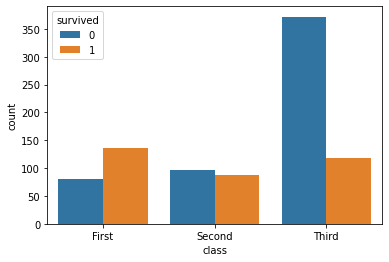

In [11]:
sns.countplot(data=df, x="class", hue="survived")

## 11. barplot을 그립니다. x축에는 class를 y축에는 fare를 그리고 alive 에 따라 다르게 색상을 표현해 주세요.
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAEGCAYAAACKB4k+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0
dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAWkElEQVR4nO3de5RdZZnn8e9DLhQxDCEhAhK7K0CW
QwIIJCpgo2CYEBpGYIYmuBBQ5OI0tmEaCNhKFFc3LeCaHmHZjOEaUBtilMHVIgJRLqMCSSCEqxZy
s9IpSAJBEiChkmf+qM22CAkpUuecXVXn+1mr1tln7/fs/RwOqV+97977PZGZSJIEsFXVBUiS+g5D
QZJUMhQkSSVDQZJUMhQkSaXBVRfQGzvssEO2trZWXYYk9SsLFy5cnpmjN7atX4dCa2srCxYsqLoM
SepXIuK5TW1z+EiSVDIUJEklQ0GSVOrX5xQkqZbefPNN2tvbeeONN6oupSZaWloYM2YMQ4YM6fFr
DAVJKrS3t7PtttvS2tpKRFRdTq9kJitWrKC9vZ2xY8f2+HUOH0lS4Y033mDUqFH9PhAAIoJRo0a9
516PoSBJ3QyEQHjLlrwXQ0GSVDIUmsyMGTM46aSTmDFjRtWlSE2htbWV5cuXA3DggQdWXM3meaK5
yXR0dLBkyZKqy5Ca0m9+85uqS9gsewqSVCNHH300EydOZMKECcyaNesd24cPHw7A8ccfz89+9rNy
/ec+9znmzp3LunXrOPfcc/nIRz7C3nvvzfe+972G1f4WQ0GSauSaa65h4cKFLFiwgMsuu4wVK1Zs
tN20adOYM2cOAGvXrmXevHkcccQRXH311Wy33XbMnz+f+fPnc+WVV/LMM8808i04fCRJtXLZZZdx
8803A/DHP/6Rtra2jbY7/PDDmT59OmvWrOG2227jE5/4BNtssw233347ixcvZu7cuQC88sortLW1
vaf7DHrLUJCkGrjrrru48847+e1vf8uwYcM4+OCDN3mPQEtLCwcffDC/+MUvuOmmmzj++OOBrhvO
Lr/8cg477LBGlv42Dh9JUg288sorbL/99gwbNownn3yS++67713bT5s2jWuvvZZ7772XqVOnAnDY
YYdxxRVX8OabbwLw+9//ntWrV9e99u4MBUmqgalTp9LZ2ckee+zB+eefz/777/+u7adMmcLdd9/N
oYceytChQwE49dRTGT9+PPvttx977rknZ5xxBp2dnY0ov+TwkSTVwNZbb83Pf/7zd6x/9tlny+VV
q1aVy0OGDOGll156W9utttqKiy66iIsuuqhudW6OPQVJUslQkCSVDAVJUslQkCSVDAVJUslQkCSV
vCRVkjZh4rnX13R/Cy89qab7qwd7CpKkUt1CISKuiYgXI+LRbutGRsQdEdFWPG5frI+IuCwinoqI
xRGxX73qkqS+6tlnn2WPPfbgtNNOY8KECUyZMoXXX3+dRYsWsf/++7P33ntzzDHH8PLLL9ethnr2
FK4Dpm6w7nxgXmaOA+YVzwEOB8YVP6cDV9SxLknqs9ra2jjzzDN57LHHGDFiBD/+8Y856aSTuPji
i1m8eDF77bUXF154Yd2OX7dQyMx7gJc2WH0UMLtYng0c3W399dnlPmBEROxcr9okqa8aO3Ys++yz
DwATJ07kD3/4AytXruSTn/wkACeffDL33HNP3Y7f6HMKO2bm0mK5A9ixWN4F+GO3du3FuneIiNMj
YkFELFi2bFn9KpWkCmy99dbl8qBBg1i5cmVDj1/ZiebMTCC34HWzMnNSZk4aPXp0HSqTpL5ju+22
Y/vtt+fee+8F4IYbbih7DfXQ6EtSX4iInTNzaTE89GKxfgnwwW7txhTrJKkyfeUS0tmzZ/PFL36R
1157jV133ZVrr722bsdqdCj8FDgZ+FbxeEu39V+KiBuBjwGvdBtmkqSm0NrayqOPlhdscs4555TL
m/vSnlqpWyhExL8BBwM7REQ78HW6wmBORHwBeA44rmh+K/DXwFPAa8Dn61WXJGnT6hYKmfmZTWya
vJG2CZxZr1okST3jHc2SpJKhIEkqOSFeH/b8N/eq+T47XxoJDKbzpefqsv+/mPlIzfcpqXHsKUiS
SvYUJGkTat2b7g89aXsKkqSSPQVJ6iNmzpzJyJEjOeusswD46le/yvvf/37Wrl3LnDlzWLNmDccc
cwwXXnghq1ev5rjjjqO9vZ1169ZxwQUXMG3atF7XYE9BkvqIU045heuv7/q2t/Xr13PjjTey0047
0dbWxgMPPMCiRYtYuHAh99xzD7fddhsf+MAHePjhh3n00UeZOnXDbyrYMvYUJKmPaG1tZdSoUTz0
0EO88MIL7LvvvsyfP5/bb7+dfffdF4BVq1bR1tbGQQcdxNlnn815553HkUceyUEHHVSTGgwFSepD
Tj31VK677jo6Ojo45ZRTmDdvHl/5ylc444wz3tH2wQcf5NZbb+VrX/sakydPZubMmb0+vqEgSX3I
Mcccw8yZM3nzzTf54Q9/yODBg7ngggs44YQTGD58OEuWLGHIkCF0dnYycuRIPvvZzzJixAiuuuqq
mhzfUJCkTajiEtKhQ4dyyCGHMGLECAYNGsSUKVN44oknOOCAAwAYPnw43//+93nqqac499xz2Wqr
rRgyZAhXXFGbbzE2FCSpD1m/fj333XcfP/rRj8p106dPZ/r06W9rt9tuu3HYYYfV/PhefSRJfcTj
jz/O7rvvzuTJkxk3blwlNdhTkKQ+Yvz48Tz99NOV1mBPQZK66fp6l4FhS96LoSBJhZaWFlasWDEg
giEzWbFiBS0tLe/pdQ4fSVJhzJgxtLe3s2zZsqpLqYmWlhbGjBnznl5jKEhSYciQIYwdO7bqMirl
8JEkqWQoSJJKhoIkqWQoSJJKhoIkqWQoSJJKhoIkqWQoSJJKhoIkqeQdzU1mh5b1QGfxKElvV0ko
RMT/BE4FEngE+DywM3AjMApYCJyYmWurqG8gO2fvlVWXIKkPa/jwUUTsAnwZmJSZewKDgOOBi4F/
yczdgZeBLzS6NklqdlWdUxgMbBMRg4FhwFLgU8DcYvts4OiKapOkptXwUMjMJcC3gefpCoNX6Bou
WpmZnUWzdmCXjb0+Ik6PiAURsWCgTG8rSX1FFcNH2wNHAWOBDwDvA6b29PWZOSszJ2XmpNGjR9ep
SklqTlWcaD4UeCYzlwFExE+AjwMjImJw0VsYAyypoLb3bMaMGXR0dLDTTjtxySWXVF2OJPVKFecU
ngf2j4hhERHAZOBx4FfAsUWbk4FbKqjtPevo6GDJkiV0dHRUXYok9VoV5xTup+uE8oN0XY66FTAL
OA/4+4h4iq7LUq9udG2S1OwquU8hM78OfH2D1U8DH62gHElSwWkuJEklQ0GSVDIUJEklQ0GSVDIU
JEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEkl
Q0GSVDIUJEklQ0GSVDIUJEklQ0GSVBpcdQGNMvHc6+uy322Xv8og4Pnlr9b8GDdvW9PdSdJm2VOQ
JJUMBUlSyVCQJJUMBUlSyVCQJJV6FAoR8VcR8flieXREjO3NQSNiRETMjYgnI+KJiDggIkZGxB0R
0VY8bt+bY0iS3rvNhkJEfB04D/hKsWoI8P1eHvc7wG2Z+Z+BDwNPAOcD8zJzHDCveC5JaqCe9BSO
AT4NrAbIzP8AtvgK+ojYDvgEcHWxv7WZuRI4CphdNJsNHL2lx5AkbZmehMLazEwgASLifb085lhg
GXBtRDwUEVcV+9wxM5cWbTqAHTf24og4PSIWRMSCZcuW9bIUSVJ3PQmFORHxPWBERJwG3Alc2Ytj
Dgb2A67IzH3p6oG8baioewhtKDNnZeakzJw0evToXpQhSdrQZqe5yMxvR8R/Af4EfAiYmZl39OKY
7UB7Zt5fPJ9LVyi8EBE7Z+bSiNgZeLEXx5AkbYF3DYWIGATcmZmHAL0JglJmdkTEHyPiQ5n5O2Ay
8HjxczLwreLxllocT5LUc+8aCpm5LiLWR8R2mflKDY/7d8APImIo8DTwebqGsuZExBeA54Djang8
SVIP9GSW1FXAIxFxB8UVSACZ+eUtPWhmLgImbWTT5C3dpySp93oSCj8pfiRJA1xPTjTP3lwbSdLA
sNlQiIhxwD8D44GWt9Zn5q51rEuSVIGe3KdwLXAF0AkcAlxP76e5kCT1QT0JhW0ycx4QmflcZn4D
OKK+ZUmSqtCTE81rImIroC0ivgQsAYbXtyxJUhU22VOIiBuKxf8LDAO+DEwETqTr5jJJ0gDzbj2F
iRHxAeAEuuY6eg04uyFVSZIq8W6h8H/o+l6DXYGFQNA1Sd1bj159JEkDzCaHjzLzsszcA7gmM3fN
zLHdHxtYoySpQTZ79VFm/o9GFCJJql5Prj7Su1g/9H1ve5Sk/sxQ6KXV46ZUXYIk1UxPbl6TJDUJ
Q0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GSVDIUJEklQ0GS
VDIUJEklQ0GSVKosFCJiUEQ8FBH/XjwfGxH3R8RTEXFTRAytqjZJalZV9hSmA090e34x8C+ZuTvw
MvCFSqqSpCZWSShExBjgCOCq4nkAnwLmFk1mA0dXUZskNbOqegr/G5gBrC+ejwJWZmZn8bwd2GVj
L4yI0yNiQUQsWLZsWf0rlaQm0vBQiIgjgRczc+GWvD4zZ2XmpMycNHr06BpXJ0nNbXAFx/w48OmI
+GugBfhPwHeAERExuOgtjAGWVFCbJDW1hvcUMvMrmTkmM1uB44FfZuYJwK+AY4tmJwO3NLo2SWp2
fek+hfOAv4+Ip+g6x3B1xfVIUtOpYviolJl3AXcVy08DH62yHklqdn2ppyBJqpihIEkqGQqSpJKh
IEkqGQqSpJKhIEkqGQqSpJKhIEkqGQqSpJKhIEkqGQqSpJKhIEkqGQqSpJKhIEkqGQqSpJKhIEkq
GQqSpJKhIEkqGQqSpJKhIEkqGQqSpJKhIEkqDa66AEk9N2PGDDo6Othpp5245JJLqi5HA5ChIPUj
HR0dLFmypOoyNIA5fCRJKtlTUNNyKEZ6J0NBTcuhGOmdDAWpDp7/5l512W/nSyOBwXS+9FzNj/EX
Mx+p6f7UPzX8nEJEfDAifhURj0fEYxExvVg/MiLuiIi24nH7RtcmSc2uihPNncDZmTke2B84MyLG
A+cD8zJzHDCveC5JaqCGh0JmLs3MB4vlV4EngF2Ao4DZRbPZwNGNrk2Sml2ll6RGRCuwL3A/sGNm
Li02dQA7buI1p0fEgohYsGzZsobUKUnNorITzRExHPgxcFZm/ikiym2ZmRGRG3tdZs4CZgFMmjRp
o2008Ew89/qa73Pb5a8yCHh++as13//N29Z0d6UdWtYDncWjVHuVhEJEDKErEH6QmT8pVr8QETtn
5tKI2Bl4sYrapL7snL1XVl2CBrgqrj4K4Grgicz8X902/RQ4uVg+Gbil0bVJUrOroqfwceBE4JGI
WFSs+wfgW8CciPgC8BxwXAW1SVJTa3goZOb/A2ITmyc3shZJ0ts5IZ4kqeQ0F5LUAP1lAkZDQU1r
/dD3ve1Rqqf+MgGjoaCmtXrclKpLUC/0l7+8+xtDQVK/1F/+8u5vPNEsSSrZU5BUV/WYogTqPU3J
pTXdH9T3uzCgdt+HYU9BklQyFCRJJYePJPVLXlJcH4aCpH6pv11S3F+mPTcUJKkB+su0555TkCSV
DAVJUslQkCSVDAVJUslQkCSVDAVJUslQkCSVDAVJUslQkCSVDAVJUslQkCSVDAVJUslQkCSVDAVJ
UslQkCSVDAVJUslQkCSV+lQoRMTUiPhdRDwVEedXXY8kNZs+EwoRMQj4LnA4MB74TESMr7YqSWou
fSYUgI8CT2Xm05m5FrgROKrimiSpqURmVl0DABFxLDA1M08tnp8IfCwzv7RBu9OB04unHwJ+19BC
G2sHYHnVRWiL+Nn1bwP98/vLzBy9sQ2DG11Jb2XmLGBW1XU0QkQsyMxJVdeh987Prn9r5s+vLw0f
LQE+2O35mGKdJKlB+lIozAfGRcTYiBgKHA/8tOKaJKmp9Jnho8zsjIgvAb8ABgHXZOZjFZdVtaYY
Jhug/Oz6t6b9/PrMiWZJUvX60vCRJKlihoIkqWQoVCAi1kXEom4/rRExKSIuew/7GBERf1vPOptZ
RHw1Ih6LiMXFZ/SxBh//4Ij490Yec6CKiFHd/q11RMSSYnllRDy+idd8MyIO7cG+WyPi0dpXXZ0+
c6K5ybyemftssO5ZYMGGDSNicGZ2bmQfI4C/Bf619uU1t4g4ADgS2C8z10TEDsDQisvSFsrMFcA+
ABHxDWBVZn47IlqBjQZvZs7c2PqIGJSZ6+pTad9gT6GP6P6XYUR8IyJuiIhfAzdExISIeKD462Zx
RIwDvgXsVqy7tNLiB56dgeWZuQYgM5dn5n9ExMSIuDsiFkbELyJiZ4CI2D0i7oyIhyPiwYjYLbpc
GhGPRsQjETGtaHtwRNwVEXMj4smI+EFERLFtarHuQeC/VfXmm8ygiLiy6BXeHhHbAETEdcUsC0TE
sxFxcfG5/E3x/8HDEfEwcGaVxdeDoVCNbbp1Z2/eRJvxwKGZ+Rngi8B3it7FJKAdOB/4Q2buk5nn
NqbspnE78MGI+H1E/GtEfDIihgCXA8dm5kTgGuCfivY/AL6bmR8GDgSW0vVLfR/gw8ChwKVvhQiw
L3AWXZ/xrsDHI6IFuBL4r8BEYKcGvE/BOLo+uwnASuC/b6LdiszcLzNvBK4F/q74vAcch4+qsbHh
ow39NDNfL5Z/C3w1IsYAP8nMtuKPS9VBZq6KiInAQcAhwE3APwJ7AncU/+0HAUsjYltgl8y8uXjt
GwAR8VfAvxVDDS9ExN3AR4A/AQ9kZnvRbhHQCqwCnsnMtmL99/nzHF+qn2cyc1GxvJCuz2JjboKu
c3nAiMy8p1h/A10zOw8YhkLftfqthcz8YUTcDxwB3BoRZwBPV1ZZEyh+md8F3BURj9A1TPBYZh7Q
vV0RCu/Vmm7L6/DfYZU2/Cy22US71ZtYP+A4fNQPRMSuwNOZeRlwC7A38CqwJb+QtBkR8aHivM1b
9gGeAEYXJ6GJiCERMSEzXwXaI+LoYv3WETEMuBeYFhGDImI08AnggXc57JNAa0TsVjz/TI3flmog
M1cCK4ueIMAJVdZTD4ZC/3Ac8Ggx1LAncH1xRcWvixOZnmiureHA7Ih4PCIW0zX2PxM4Fri4OMG4
iK7zBwAnAl8u2v6GrvMBNwOLgYeBXwIzMrNjUwcshp1OB35WnNB8sS7vTLXweeC7xb/HATeO6zQX
kqSSPQVJUslQkCSVDAVJUslQkCSVDAVJUslQkLZQMUfVOVXXIdWSoSBJKhkKUg9FxEnFLLUPR8QN
G2w7LSLmF9t+XNzVTET8TXGD4cMRcU+xbmOz3kp9gjevST0QERPoukv5wMxcHhEjgS/z57n5RxV3
mRMR/wi8kJmXF/MmTc3MJRExIjNXRsTlwH2Z+YOIGAoM6jb5oVQpewpSz3wK+FFmLgfIzJc22L5n
RNxbhMAJwIRi/a+B6yLiNLpmVoWuWW//ISLOA/7SQFBfYihItXEd8KXM3Au4EGgByMwvAl8DPggs
LHoUPwQ+DbxO16y3n6qmZOmdDAWpZ35J17dujQIoho+625au71cYQreZMyNit8y8v/h6x2V0fXnP
xma9lfoE53GXeiAzH4uIfwLujoh1wEN0fa/2Wy4A7qfrF//9/Hla80uLE8kBzKNr1tTzgBMj4k2g
A7ioIW9C6gFPNEuSSg4fSZJKhoIkqWQoSJJKhoIkqWQoSJJKhoIkqWQoSJJK/x8rNlJrt6t92gAA
AABJRU5ErkJggg==
">

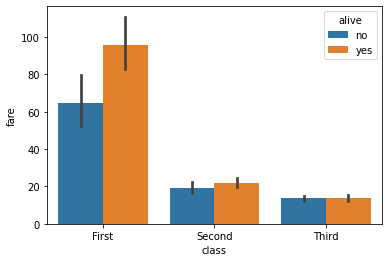

In [12]:
sns.barplot(data=df, x="class", y="fare", hue="alive")

## 12. pointplot 을 그립니다. x축에는 deck 을 y축에는 fare를 그립니다. alive 에 따라 다른 색상으로 표현해 주세요.
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYUAAAEGCAYAAACKB4k+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0
dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO3dd3hUZfbA8e+ZVGpooZcA0ouUUAVE
UQEbYAWlCYioqKtrXV3d6rqW37roWkA6CqjYRRAFQaWGrvROqCHU9GTm/f1xJ2EC6ZmZm0nO53nm
mTvvLXMGkpy5977vecUYg1JKKQXgsDsApZRSJYcmBaWUUlk0KSillMqiSUEppVQWTQpKKaWyBNsd
QHHUqFHDREVF2R2GUkoFlPXr158yxkTmtC6gk0JUVBQxMTF2h6GUUgFFRA7mtk4vHymllMqiSUEp
pVQWTQpKKaWyBPQ9BaWU8qb09HRiY2NJSUmxOxSvCA8Pp379+oSEhBR4H58lBRGZBtwMnDTGtHW3
zQdauDepApw1xnQQkShgO7DTvW61MWaCr2JTSqmcxMbGUqlSJaKiohARu8MpFmMM8fHxxMbG0rhx
4wLv58szhRnA28CszAZjzN2ZyyLyBnDOY/u9xpgOPoxHKaXylJKSUioSAoCIUL16deLi4gq1n8+S
gjFmhfsM4DJi/YvfBVzrq/dXSqmiKA0JIVNRPotdN5p7AyeMMbs92hqLyEYRWS4ivXPbUUTGi0iM
iMQUNgOWKbMGw6RO1rNSShWQXUlhGDDX4/UxoKExpiPwBPCRiFTOaUdjzGRjTLQxJjoyMscBeQrg
7CE4vdd6VkrZJioqilOnTgHQs2dPm6PJn9+TgogEA7cB8zPbjDGpxph49/J6YC/Q3N+xKaWUL61c
udLuEPJlx5nCdcAOY0xsZoOIRIpIkHu5CdAM2GdDbEopVWSDBw+mc+fOtGnThsmTJ1+2vmLFigAM
HTqUb7/9Nqt99OjRfPrppzidTp566im6dOlC+/btef/99/0WeyafJQURmQusAlqISKyIjHWvGkr2
S0cAfYAtIrIJ+BSYYIw57avYlFLKF6ZNm8b69euJiYlh0qRJxMfH57jd3XffzccffwxAWloaP/74
IzfddBNTp04lIiKCdevWsW7dOqZMmcL+/fv9+RF82vtoWC7to3NoWwAs8FUsSinlD5MmTeLzzz8H
4PDhw+zevTvH7QYOHMhjjz1GamoqixYtok+fPpQrV47vv/+eLVu28OmnnwJw7tw5du/eXahxBsWl
I5qVUsoLfvrpJ3744QdWrVpF+fLl6du3b64jo8PDw+nbty+LFy9m/vz5DB06FLAGnL311lv079/f
n6Fno7WPlFLKC86dO0fVqlUpX748O3bsYPXq1Xluf/fddzN9+nR+/vlnBgwYAED//v159913SU9P
B2DXrl0kJib6PHZPmhSUUsoLBgwYQEZGBq1ateLZZ5+le/fueW5/ww03sHz5cq677jpCQ0MBGDdu
HK1bt6ZTp060bduWBx54gIyMDH+En0UvHymllBeEhYXx3XffXdZ+4MCBrOWEhISs5ZCQEE6fzt6f
xuFw8PLLL/Pyyy/7LM786JmCUkqpLJoUlFJKZdGkoJRSKosmBaWUUlk0KSillMqiSUEppVQW7ZKq
lFJFkJCawRcbj7D+4BlCgxz0a1WTfq1qEeQI7El6NCkopVQh7Th+npFT13LyQmpW2/yYw3SJqsrU
0V2oHB5iY3TFo5ePlFKqENKdLsbNjMmWEDKtO3CGl778vVjHP3DgAK1ateL++++nTZs23HDDDSQn
J7Np0ya6d+9O+/btGTJkCGfOnCnW++RGk4JSShXCj9tPEHsmOdf1X28+SlwOCaMwdu/ezcMPP8zv
v/9OlSpVWLBgASNHjuTf//43W7ZsoV27dvz1r38t1nvkRpOCUkoVwraj5/Ncn+Ey7D55oVjv0bhx
Yzp06ABA586d2bt3L2fPnuXqq68GYNSoUaxYsaJY75EbTQpKKVUIlQpwv6C49xTCwsKyloOCgjh7
9myxjlcYmhSUUqoQBrarTV79ixrXqEDrOpW9+p4RERFUrVqVn3/+GYDZs2dnnTV4m/Y+UkqpQqhf
tTwT+jbl3Z/2XrYuSIQ/39wKhw+6pc6cOZMJEyaQlJREkyZNmD59utffAzQpKKVUoT3dvwV1I8J5
f8W+rJvOnRpW4Y83tOCqK2oU69hRUVH89ttvWa+ffPLJrOX8Ju7xBk0KSilVSCLCiB5R3NutEScu
pBAa5KB6xbD8dwwAmhSUUqqIHA6hTkQ5u8PwKp/daBaRaSJyUkR+82j7i4gcEZFN7seNHuueE5E9
IrJTROybtVoppcowX/Y+mgEMyKH9P8aYDu7HQgARaQ0MBdq493lHRIJ8GJtSSqkc+CwpGGNWAKfz
3dAyCJhnjEk1xuwH9gBdfRWbUkqpnNkxTmGiiGxxX16q6m6rBxz22CbW3XYZERkvIjEiEhMXF+fr
WJVSqkzxd1J4F2gKdACOAW8U9gDGmMnGmGhjTHRkZKS341NKqYJJvQDrpsJn4+HLibDjW3A57Y6q
2Pza+8gYcyJzWUSmAN+4Xx4BGnhsWt/dppRSJc+J32H2bZBw/GLbxtnQsAfcMx/CI+yLrZj8eqYg
InU8Xg4BMnsmfQUMFZEwEWkMNAPW+jM2pZQqEGc6zB2aPSFkOrQKFj5V5EO/+OKLvPnmm1mvn3/+
ef773//y2muv0aVLF9q3b89LL70EQGJiIjfddBNXXnklbdu2Zf78+UV+X0++7JI6F1gFtBCRWBEZ
C7wqIltFZAtwDfA4gDHmd+BjYBuwCHjYGBP452FKqdJn53dw9lDu639bAAkni3ToMWPGMGvWLABc
Lhfz5s2jdu3a7N69m7Vr17Jp0ybWr1/PihUrWLRoEXXr1mXz5s389ttvDBiQU2fPwvPZ5SNjzLAc
mqfmsf0/gX/6Kh6llPKK41vzXu/KgLgdULFmoQ8dFRVF9erV2bhxIydOnKBjx46sW7eO77//no4d
OwKQkJDA7t276d27N3/84x955plnuPnmm+ndu3dRPs1ldESzUkoVRngBKqCGFb1K6rhx45gxYwbH
jx9nzJgx/Pjjjzz33HM88MADl227YcMGFi5cyAsvvEC/fv148cUXi/y+mbR0tlJKFUbrQZBX8exq
TaF2+yIffsiQISxatIh169bRv39/+vfvz7Rp00hISADgyJEjnDx5kqNHj1K+fHmGDx/OU089xYYN
G4r8np70TEEppQqjSkPo9Qf45T+Xr5MgGPAvcBT9+3ZoaCjXXHMNVapUISgoiBtuuIHt27fTo0cP
ACpWrMicOXPYs2cPTz31FA6Hg5CQEN59990iv6cnTQpKKVVY/V6CyvVg5aSLN53rd4Vrn4cmfYt1
aJfLxerVq/nkk0+y2h577DEee+yxbNs1bdqU/v29XyZOk4JSShWWCHS9H6LHwoVjEBwGFYo3jwLA
tm3buPnmmxkyZAjNmjXzQqCFp0lBKaWKyuGAiBwr8hRJ69at2bdvn9eOVxR6o1kppTwYY+wOwWuK
8lk0KSillFt4eDjx8fGlIjEYY4iPjyc8PLxQ++nlI6WUcqtfvz6xsbGUlgrM4eHh1K9fv1D7aFIo
jZwZ4Ex1vwj8bzxK+UtISAiNGze2Owxb6eWj0mb9DHizHZyLtV6fOQDLXwOXy86olFIBQs8USpO1
U2Dhk9nbjAuW/QNSzkJ/LS2llMqbnimUFunJsPQfua9f/S6c0ykqlFJ506RQWhxcaZ0N5MY4Ydci
/8WjlApIevmotMhI8c42JcSIqWuIPZNM/arlmD22m93hKFVmaFIoLep2tIpx5TU3UbUm/ounmGLP
JLP/VKLdYShV5ujlo9Kicl1od0fe23z9B4iN8U88SqmApEmhNOn/MgSFXt4e7B7RmHAcpg+EjXP8
G5dSKmBoUihNdnwLzjRrOSjMeq5UB57cDa1utV470+DLh+G7Z6wJyJVSyoMmhdLC5YKVb1nL4oBK
tazlkPLW9IF3zYJrXyBrxqg178HsIZAYb0u4SqmSyWdJQUSmichJEfnNo+01EdkhIltE5HMRqeJu
jxKRZBHZ5H6856u4Sq3diyF+t7Xc6lZwhGRfLwJ9noJhcyG0ktV24GeY0jf/iciVUmWGL88UZgAD
LmlbArQ1xrQHdgHPeazba4zp4H5M8GFcpVPmWQJAz0dz367FQLj/R2seWbBmjZp6A/z2mW/jU0oF
BJ8lBWPMCuD0JW3fG2My3C9XA4Ur36dyFrseDv5qLTe6Cup3znv7yBZw/1K44nrrdXoSfHof/PBX
cOXRpVUpVerZeU9hDPCdx+vGIrJRRJaLSO/cdhKR8SISIyIxpaW8bbGtnHRxuecjBdunXBW4Zz70
evxi2y//B3OHQco578anlAoYtiQFEXkeyAA+dDcdAxoaYzoCTwAfiUjlnPY1xkw2xkQbY6IjIyP9
E3BJdno/bP/KWq7RHJoVYiJvRxBc9xe4YxoEl7Padi+GKddC3C5vR6qUCgB+TwoiMhq4GbjXuKc3
MsakGmPi3cvrgb1Ac3/HFpBWv2NVQgXoMdGaM7aw2t4OY7+HiIbW6/g98EE/2Km1kpQqa/yaFERk
APA0cKsxJsmjPVJEgtzLTYBmgL2zVweCpNMXB6JVqAnt7y76seq0h/HLIMp95S71PMwdCiteh1Iw
NaFSqmB8VvtIROYCfYEaIhILvITV2ygMWCIiAKvdPY36AH8TkXTABUwwxpzO8cDqonVTrZvEAN3G
Q0jh5mK9TIUaMOJzWPw8rH0fMLD073B8Cwx6B8IqFjvkgno1+SWqhx4nPrk2sNxv76tUWeezpGCM
GZZD89Rctl0ALPBVLKVSeor7DzfWALXosd45blAI3PiqdebwzePWCOhtX0L8Xhj6IVSN8s775KO2
6yQNHMcJcen4SqX8SX/jAtWWeZDo7n3VcQSUr+bd43ccDqMXQsXa1usTv8Hka2CffmtXqjTTpBCI
XC5Y+ba1LA7o8ZBv3qdBFxj/E9SLtl4nn7ZKY6x+V+8zKFVKaVIIRLsWXSxp0XqQby/pVK4Do7+F
DsOt18YJi56FLx6yLmEppUoVTQqBKFtJiwIOViuOkHAY9DYMfM2ayAdg80cw40Y4f9T376+U8htN
CoEmNgYOrbSWG10F9fIpaeEtIlYPp5FfQDn3/Ysj62FyXzi81j8xKKV8TpNCoMlW0iKPwne+0riP
dZ+hVjvrdcIJmHETbJjl/1iUUl6nSSGQnN4H27+2lms0h2Y32BNH1UYwdjG0GWK9dqbBV4/At0/q
xD1KBThNCoFklUdJi56PFK2khbeEVoA7pkO/l8iauGfdFJg1GBJP2ReXUqpYNCkEiktLWrS7y954
wLrP0PsJuOdjCIuw2g7+Yt1nOLbZ1tCUUkWjSSFQrPsAMpKt5W4PFL+khTc1v8GauKeGu4bhucMw
tT9s/dTeuJRShaZJIRCkp8Aaz5IWY+yNJyc1msG4H6C5e7K9jGRYMBaWvKgT9ygVQDQpBILNcyHJ
fZ3eFyUtvCU8AobOhd5PXmz79b/w0V2QfMa+uJRSBaZJoaRzuWCVH0paeIvDAf3+DHfOtM5qAPb8
YE3cc3KHvbEppfKlSaGk2/WdNekN+L6khTe1GQxjl0CVRtbr0/vgg+tgx0J741JK5UmTQkmXraSF
DYPViqN2W2ugW+M+1uu0CzBvGCx/1ToDUkqVOJoUSrLD6+DQKmu5US+o18neeIqifDUY/jl097js
teyf8MlISE2wLy6lVI40KZRkniUtrgqwswRPQcEw4F8w+D0ICrPatn8NU6+3LisppUoMTQolVbaS
Fi3giuvtjccbOgyD+76DSnWt1ye3WRP37F1mb1xKqSyaFEqqVf8D3BPZ2F3Swpvqd7buMzToZr1O
OQtzbrMmDdKJe5SyXSn5S1PKJMbDxg+t5Qo1oX0JKGnhTZVqwaivodMo67VxwffPw+cPQGoCGTsX
E2HOAxBKmo2BKlX2aFIoiS4taREcZm88vhAcBrf8F256AxzBVtuW+aT/uwnBc++iMtZN6FrmFMcn
3wHpyTYGq1TZ4dOkICLTROSkiPzm0VZNRJaIyG73c1V3u4jIJBHZIyJbRCQAu9p4QXoyrJ1sLYdU
KJklLbxFBLqMg5FfQfkaAIS4UrNtYgzUPrqE/R8+ZkeESpU5vj5TmAEMuKTtWeBHY0wz4Ef3a4CB
QDP3Yzzwro9jK5k8S1p0KsElLbwp6ipO9f5bjqvEXZW73oEFZFyI82NQSpVNPk0KxpgVwOlLmgcB
M93LM4HBHu2zjGU1UEVE6vgyvhLH5bJuuIJV0qJ7CS9p4UUH9mzLc30oGezbutJP0ShVdtlxT6GW
MeaYe/k4UMu9XA847LFdrLstGxEZLyIxIhITF1fKvjnu+g5O77WWWw+2ZjgrI1JMcL7bJLlC/BCJ
UmWbrTeajTGGrH6XBd5nsjEm2hgTHRkZ6aPIbPKr5/zLj9gXhw1C2twM5N4r9bwpR722vf0YkVJl
kx1J4UTmZSH380l3+xGggcd29d1tZcPhtXB4tbUc1TswS1oUQ8XazfnI2S/rHsJl6yWFarE/+Dco
pcogO5LCV4C7gzqjgC892ke6eyF1B855XGYq/VZ69yxha2IEh6UuWxMjin0sX9sXl8Co6Wv5c/po
3soYzHlTLmud01hZwoGxJu3ZuciuMJUqEwqUFESkl4jc516OFJHGBdxvLrAKaCEisSIyFngFuF5E
dgPXuV8DLAT2AXuAKUDZucsavxe2f2MtR7b0SkmLR0Neonfy6zwa8lKxj+VLR84mM/yDNZxKSMNJ
EBuvmMjym3/mGNWt9VKbd123ARBknDjnDdeyGEr5UL5390TkJSAaaAFMB0KAOcBV+e1rjBmWy6p+
OWxrgIfzO2ap5FnSosfE0lPSIh9xF1IZ8cEajp5LAaBHk+q8c28nwkOCOLwwDAyICM2H/osPPkph
XPBCgkw6zo+GETTyM2jU0+ZPoFTpU5C/PkOAW4FEAGPMUaCSL4MqUxJPwSZ3SYuKtUpfSYtcnEtO
Z+S0tew7lQjAlQ2qMGVUNOEhQZdt2691bcJufJk5GdZ3iSBnMs45d0Lser/GrFRZUJCkkObZS0hE
Kvg2pDJm3VTIsL4pl9qSFpdISstgzIx1bD9m1TdqUasSM+/rQsWw3E9cR/RszKEef+dTpzVhT1B6
Aq7ZQ+DYFr/ErFRZUZCk8LGIvI81mOx+4Aesa/6quMpSSQu31AwnD8xez/qDZwBoVL08s8d2pUr5
0Hz3fXZga5a3eJFvnN0BcKSewzVrsM79rJQX5ZsUjDGvA58CC7DuK7xojHkr771UgWQraTESylW1
Nx4fy3C6eHTuRn7ebX3m2pXDmTO2GzUrhxdof4dDeO3uTsyq8zxLnJ2ttuR4zKxB1s16pVSx5ZkU
RCRIRJYZY5YYY54yxjxpjFnir+BKNZfTo6RFEHR/0N54fMzlMjyzYCuLfz8BQLUKocwZ15UG1coX
6jjhIUG8N6o7r1V+lhXOdgBIwnHMrFvh7OF89lZK5SfPpGCMcQIuESn5nd0DzU6PkhZtSndJC2MM
f/tmGws2xAJQKSyYWWO6ckXNovVXqFYhlMn3XcWzIc+yxtUSADkXCzNvgfNlZ2iLUr5QkHsKCcBW
EZnqLm09SUQm5buXypuXB6uVZP+3ZBczVh4AIDzEwdTRXWhbr3jfM6JqVOCtUVfxoOsZNrqusBrP
7IdZg6weXUqpIilIUvgM+DOwAljv8VBFdWgNHF5jLUf1hrod7Y3Hhyav2MtbS/cAEBIkvDe8M10b
e6cceOdGVfnn3T0Ynf40v7vcZ1qndsKswZB8xivvoVRZk+/gNWPMzPy2UYWU7SzhUfvi8LG5aw/x
8kKrZ5BD4M27O9K3RU2vvsfAdnU4cmMXRnz7HPNC/05zxxE4sRXm3A4jvoDwyl59P6VKu3zPFESk
mYh8KiLbRGRf5sMfwZVK8Xthx7fWcmRLaFb8khYl0debj/Knz7dmvX7ltvbc1N4302OM7dWYW3q0
4960P7Hf5a7EfmQ9fHQ3pCX55D2VKq0KcvloOtYsaBnANcAsrDIXqig8S1r0fIRcy4IGsKU7TvD4
/E1ZZbBfuKkVd3VpkPdOxSAivHhLG65s1ZJ7054n1lhTe3JoJcy7B9JTfPbeSpU2BUkK5YwxPwJi
jDlojPkLcJNvwyqlspW0qA3t7rQ3Hh9YvS+eB+dsIMNlZYTH+jVjXO8mPn/fIIcwaVgHatRvyj1p
z3PcuMd87FsGn4yCjDSfx6BUaVCQpJAqIg5gt4hMFJEhQEUfx1U6rfugVJe02BJ7lnEzY0jNcAEw
5qrG/OG6Zn57//KhwUwd1QVXlSjuTfsTp4z7fsKuRfDZ/eDM8FssSgWqXJOCiMx2L34BlAceBToD
I7g4H4IqqLSkS0pa3GdvPF6268QFRk5bS0Kq9Yf3zs71eeGmVoifL49FVgpjxn1diAtrxIi05zhr
3KW6tn0BX0205sFWSuUqrzOFziJSF7gXq1x2EvBHYBywyw+xlS6b50JSvLXceVSpKmlxKD6J4R+s
4WxSOgA3tqvNK7e3x+Gw537JFTUrMXlkNHsdjRmZ9iwXMift2TwXvn0i9zk/lVJ5JoX3gB+Bllwc
mxDj8awKyuWEVaWzpMWJ8yncO3U1Jy+kAtCneST/ubsDQTYlhEzdm1TntTvbs8U05b60p0gy7kt1
66fD4j9pYlAqF7kmBWPMJGNMK2CaMaaJMaax57MfYwx8OxfCaXcv3jZDoEpDe+PxktOJaQz/YA2H
TycD0CWqKu8P70xY8OVzIthhUId6PNW/BTGmJfenP0GqCbFWrH4Hlv7D3uCUKqEKUiW19HyttctK
j6KypaSkxYWUdEZNW8vukwkAtKlbmamju1AutGQkhEwP9W3K0C4N+NXVjgnpfyA9c7zmz6/Ditft
DU6pEqhszPtoJ8+SFo37QN0O9sbjBSnpTsbOjGHrkXMANI2swKwxXakcHmJzZJcTEf4+uC19mkey
zNWRR9Im4sz8sV/6d1j1jr0BKlXCaFLwtVJW0iItw8WDc9azdv9pAOpVKceccd2oXrHkdq8NCXLw
zr2daFWnMotcXflj2gRcuO95LH4OYqbZG6BSJYgmBV86tcejpEUruOI6e+MpJqfL8MTHm1i2Mw6A
GhXD+HBcN+pElLM5svxVDAtm+ugu1IkI5wtXL/6UPvbiym+egE1z7QtOqRLE70lBRFqIyCaPx3kR
+YOI/EVEjni03+jv2LxudekpaWGM4fnPt/LNFmu+gohyIcwZ15WoGr6Zsvu4oyb7XLU57vBeAb3a
EeFMG23NBT3PeS1/TR/hXmPgy4fg98+99l5KBap8q6R6mzFmJ9ABrJndgCPA58B9wH/c038GvoQ4
2PSRtVyxNrS7w954isEYw8sLtzNvnTWzWfnQIGbc14WWtX1XgfTpcn9lf2IijStXYJkXj9uqTmXe
Hd6J+6avY7pzIOGk80zIPDAuWDAOgstBiwHFfp8RU9cQeyaZ+lXLMXtsNy9ErpR/2H35qB+w1xhz
0OY4vM+zpEX3CQFd0uLtpXuY8vN+AEKDHXwwKpqODQN38F3vZpG8fJs1lee7zlt523mbtcKVAR+P
gL1Li/0esWeS2X8qkdgzycU+llL+ZHdSGAp4XsydKCJbRGSaiOT4V0dExotIjIjExMXF+SfKwvIs
aRFaEToHbkmLGb/u540l1gD2IIfwv3s60bNpDZujKr67ohvw6LXWjG2vp9/OTG6xVjjTYO49cOBX
G6NTyj62JQURCQVuBT5xN70LNMW6tHQMeCOn/Ywxk40x0caY6MjISL/EWmibP4Jkq3cOnUZBuSr2
xlNEn66P5S9fbwOs2yH/d9eVXN+6ls1Rec/j1zfnto71AOGllKF8Huy+bJSRDB/dBbE6cF+VPXae
KQwENhhjTgAYY04YY5zGGBcwBehqY2xF53K650zAXdJigr3xFNGi347x9Kebs17/fVBbBnWoZ2NE
3icivHJ7e3o0qQ4ITyQM58cwdw+xtASYcxsc22JrjEr5m51JYRgel45ExHNariHAb36PyBt2fBvw
JS1W7IrjkbkbcU+JwDMDWjK8eyN7g/KR0GAH743oTLOaFTE4uP/caNZV6GutTDkHswfDyR22xqiU
P9mSFESkAnA98JlH86sislVEtmDN8Pa4HbEVW4CXtIg5cJoHZq8n3WllhAf7NuXBvk39Hkf9quVo
XKMC9av6fgxERLkQpt/XhchKYbhwMCx+DDsielsrk+Jh1iBrGlWlygC/d0kFMMYkAtUvaRuRy+aB
49BqiF1rLQdgSYvfj57jvhnrSE53AjC8e0Oe7t/Cllj83Y2zftXyTBvVhbveX0VyOtx6YhxL62ZQ
//QqSDhuJYb7FgbkmZ9ShWF376PSJdtZwmP2xVEEe+MSGDl1LRdSrElyBneoy99ubev3SXLs1K5+
BG/f0xGHQBohXH9sPKdrdLFWnjsMM2+F88cKdKxXk19iaegTvJr8kg8jVsr7NCl4i2dJi5qt4Yp+
9sZTCEfOJjPigzXEJ1rzGF/Xqhav3XmlbZPk2Klfq1r8dVBbAJJNGNcdf4jESPcZ35n91hlD4ql8
j1PbdZImjuPUdp30ZbhKeZ0mBW9Z9TaBWNIi7kIqwz9Yw9Fz1kC7nk2r8/Y9HQkJKrs/GiO6N+KB
PtaUIaczwrgx/nFSI61EwamdMGswJJ+xMUKlfKfs/uZ7U0KcNdUjQKU60DYwSlqcS0pnxNQ17D+V
CECHBlWYMjKa8JCSNSeCHZ4Z0JKb2lsd4g4mhXB30jM4q7vvr5zYCnNuh5TzNkaolG9oUvCGdVMu
lrToNgGCQ+2NpwASUzMYPWMtO45fAKBl7UrMuK8LFcJs6XtQ4jgcwht3Xkl0I2tg/ab4ICY4XsRV
1T3p4JH18NHdkJZoY5RKeZ8mheJKS4K1U6zl0IrQebSt4RRESrqT8bNj2HjoLABR1csza2xXqpQv
+cnMn8JDgpgyMprG7kqwSw4LL1V5GRPRwNrg0EqYdw+kp9gYpVLepUmhuDZ9GFAlLTKcLh6du5Ff
98QDUCcinDnjulGzUrjNkYv0G/EAAB6fSURBVJVMVSuEMuO+LlSrYCXM2dtdvB/1pnWZEGDfT/DJ
KMhIsy9IpbxIk0JxXFbSomRPZ+1yGZ7+dAvfbzsBQPUKocwe2436VcvbHFnJ1qh6BT4YFU1YsPXr
8sqaVL7u8B6UdxcG3LUIPrsfnBk2RqmUd2hSKI4d31jdFAHa3gZVGtgbTx6MMfzl69/5bOMRACqF
BTNzTFeuqFnR5sgCQ6eGVfnv0A5Zncoe+yGRtX2mQ7j7zHDbF/Dlw+By2RekUl6gSaGojIFfPedf
LtklLV7/fiezVlnTVoSHOJh2Xxfa1ouwOarAMqBtHZ6/sRUALgOjFyaxd8BsCK1kbbBlHnw2Dr7/
M5HGujxXjmTrjDLQzBoMkzpZz6pM0aRQVIdWwxF3aeXGV0OdK+2Nx0NKujOrVIXLZXhv+V7+t8yq
3RMSJLw/IpouUdXsDDFgje3VmNE9owBISnMy9Ns04gbNgRD3JbjfFsDKSYSTCkANcwY+vDPwbkaf
PQSn91rPqkzRpFBUniUtrnrUvjg8GGP44Od9dH/5R467B6MdPJ3EK99ZVT4dApOGduTq5iV0HooA
ICL8+ebWWfNKxF1I5d7vhcQBb+a4vQHY+yMsf8V/QSpVDJoUiuLUbti50Fqu2RqaloySFlN+3sc/
vt3O2eT0HNe/cnt7Brark+M6VXBBDmHS0I5cWd+6/LbrRALf/fRzjttmjWtfPwOcOf+/lETHzqdk
e1ZlhyaF3OR1TbUElrRISstg0o978tzGmkxGeUO50CA+GNWFBtWs0t5hZ3fnvUPyGVjzPlw44Yfo
ii/DXTo981mVHZoUcpPbNdWEONhU8kparN1/moTUvLtE/rRTi7N5U2SlMKaP7kpEuRDOmEr57/D9
8/BGc3i/Dyz9BxxaE5g3oVWppkmhsNZOBqd1E7EklbQ4n5x/H/k0/dbndVfUrMjkEZ35ll6A1Skt
X8c2w4rXYNoN8FpT+HQMbJ5nfeFQymZa6KYw0pKsOkdgdUOMvs/eeIDUDCcfrj7EpKX5XL4AukRV
9UNEZU+3JtUZOuR25n++jLuDf7ps/WlTkaP93qZt6HHY/T0c+AWc7hHQyWesHku/LQAE6naEZjdA
s+utZYcWJ1T+pUmhMDZ9eLFkcudREG5fP3+Xy/Dl5iO88f0uYs8k57t9z6bVaV+/ZJfgCGThocE8
kTGO7aYho4MWE+Ww7h1cMOEMTvs7kb/XYsGDQ6xR72mJsP9nK0HsWeJxidLA0Q3WY/krUK4aXHGd
lSCa9oMKek9I+Z4mhYJyOd03mAFHsG0lLYwx/LQrjlcX7WT7sYulm0ODHAzr2oCjZ1NYsj37zcyu
javxv3s6+TvUMuWH7ScxOJjhHMAMZ39+Cn2CKMcJ4kwVDplaHDp4ht0nLtCsViUIrQAtBlgPY+DU
Lti9xEoSB1eCy91LKfk0bP3YeiBQr/PFs4g6HcChV3+V92lSKKjtX8OZA9Zym9sgor7fQ9h0+Cyv
fLed1ftOZ7WJwJAO9Xj8+uY0qGYNoNpx/DzDJq/mTFI6dSLCmT++e5maVtMOGdnKWwguLv/3vv4/
K2gaWYHuTarTvUl1ujWpZhUijGxhPXpOhNQLsH+FO0ksgfOx7r2NNVjySAz89DJUiLTOIq64Dppe
C+V1MKLyDtuSgogcAC4ATiDDGBMtItWA+UAUcAC4yxhj/xRXxsBK+0pa7I1L4PXFO/nut+PZ2q9p
EcnTA1rSqk7lbO0ta1emSvlQziSlEx4SpAnBD6IbVeXLTUfz3W5vXCJ74xL5cI11yejyJFEJWt5k
PYyBuB3WGcTuJXBoFbjcHQoS3RM7bZ4L4oD6XawziCuuh9rt9SxCFZndZwrXGGM8J7x9FvjRGPOK
iDzrfv2MPaF5OLTamlQFoElfqNPeL2978nwKb/64m/nrDuN0XezW0qFBFZ4d2JLuOu6gxBjSqT5v
L9vDifOpOa6/qV0dUjNcrN0fz/mUiz3FLk0STTySRPfG1ahZsxXUbAVXPWbN9LZ/uTtJ/AAX3EnI
uODwGuux9B9QsdbFexFNrinx5dxVyWJ3UrjUIKCve3km8BMlISn4+SzhfEo67y/fy9Rf9pOSfvGy
RJMaFXh6QAv6t6mt3/5LmIphwcwa0437Z8Vw6HRStnWP9WvGH65rhojgdBm2HzvP6n3xrN53+rIk
sS8ukX1xiXyUW5JodQu0usU6izjxu/tm9Q/WFxfjHvOQcMLqFLHpQ6uke4Nu0Ow691lEuxIx2FKV
XGIK1LHaB28ssh84gzU0+H1jzGQROWuMqeJeL8CZzNc5iY6ONjExMb4JcFIna/BaREM45+4dUrMN
PPirz36pUtKdzFl9kLeX7eFs0sWSCDUrhfH49c25s3N9goMKdlngmtd/Yv+pRBrXqMCyJ/v6JF51
uQyni2U742j+8dU04hiHpQ4NXtqR6/b5JYlLXZYkKrsnR0o+a034s3uJ1aMpIZeR05XqeJxF9M3e
gy4jDVa/AxtmYk7vQ4DzVKTyczsgrACD81TAEJH1xpjonNbZeabQyxhzRERqAktEJNtvjjHGiMhl
GUtExgPjARo2bOj7KFPOXlz2UUkLp8vwxcYj/N+SXRw5e7F7aaXwYCZc3ZQxVzWmXKj2Vw8EwUEO
rm9di8Mi7kooef+8BDmEtvUiaFsvgnG9mxTzTGIANdsMtuZ0OLH14s3q2LXWJSaAC8dg42zr4QiG
Bt0vXmb64S+wbymeUVcmAWbeAqO+gTCde6MssC0pGGOOuJ9PisjnQFfghIjUMcYcE5E6wGV1GYwx
k4HJYJ0p+DBC6ynVmtieSnWh7e3efQdjWLbzJP/+bic7T1zIag8NcjCqZyMe6nsFVSuUjBHTyj+8
lyQi6d5hIjX7PAlJp2HfMus+xJ4l1k1qsG5aH/zFevBS7kEd3Qhr3oU+T/nwk6uSwpakICIVAIcx
5oJ7+Qbgb8BXwCjgFffzl34P7uR262bd6X3uBndy6PaAV0tabDh0hle+28Ha/dm7l97eqT6PX9+c
elXKee29VODKKUnsOH6e1ftOs3pfPGv2FTRJ9KB7v5uoOSgUjm++OC4iNoasn/G8bJ6nSaGMsOtM
oRbwuftmaTDwkTFmkYisAz4WkbHAQeAuv0Z14neY1v/i2YGnU7u88hZ7Tibw2uIdLP49+zXffi1r
8tSAFrSsXTmXPZWykkSbuhG0qRvB2F6Ni5EkhtP9rkepGZQIe5fCt09A6vnc3hYuaDHFssKWpGCM
2QdcNlWZMSYesG9ygu9fyDkhgNWTo+v9Vj2aIjh+LoU3f9jFxzGH8ehdSqeGVXh2YCu6NtbBR6XJ
cUdN0tNdxIfUxJczd3snSbRkQkRnGp5cluv7uJypOHb/YPViUqVaSeuSap/EeOsbU162flropHAu
KZ13l+9l+q/7Sc242L30ipoVebp/C65vXUu7l5ZCT5f7K/sTE2lcuQK5/6n1vqImiVhHV2aFLsOY
7H0pMl87nKnw4e3QfCD0/ydUb+rHT6X8SZNCJs9eRrlJLsA2mYdLdzJr1QH+t2wv5zxmQqtdOZzH
r2/G7Z0K3r1UqaIqaJJY4WrPuxm38GDw19n2F4Ejpjr1JN5q2PWdNb1oj4eh95PaI6kU0qSQqXI9
qy92bpePAGq2zPcwTpdhwYZY/rNkF8fOXZzKsHJ4MA9dcwWje0YRHqLdS5U9cksSY2as49/nh7HC
1Z6hQcvo71hHuKRz3FTlqtRJDCi3g/dqfGKV3XCmwS//sSabuv5v0P4uHRBXiuhX1Uwh4dBpVB7r
y8OV9+S62hjDkm0nGPjfFTz96ZashBAa7OCBq5vw89PXMuHqppoQVImSmSRudM/dvcrVhsfSJ3LU
WCVUkkwYIOypFI1r/M8w4BUIcw94SzgOn4+HqTfAkQ02fQLlbZoUPF37gjWI51Ih5eCu2bnWs485
cJo731vF/bNi2HUiAQCHwF3R9fnpyb48N7AVEeVDfBm5UsVyX8/GlM9jgOSek4mM/2gLFzqMg0c3
uL9Auc8OYtfClGvhy4k6e1wpoEnBU0g5GL4Ahs4lEWucwDkqwSMbcux1sfvEBcbNjOGO91YRc/Bi
MdfrW9di8R/68OodV1JXxxuoANCwenmmje5Crcph2doFCAmy/vj/sP0EQ95Zyb6kcLh1Eoz/yaqr
BICxRkm/1QlW/Q+c6ajApEnhUo4gaHkjp8WauvK8VILKdbNtcvRsMk9/upn+b67gB48JbaIbVeXT
CT2YMjLamkxFqQDSvUl1fnnmWt4f0Zkgh5UIgoMcfPbgVdSNsGos7TmZwKD//crSHSegbgcYsxhu
+8CqqQTWWIfFf4J3r4I9P9r1UVQxaFLIwc7jF3C5CwW6jCEl3ao+eTYpjX8t3M41r//ExzGxWeMN
mtWsyAcjo/lkQg+io3S8gQpcIUEO+repjcPjxnG7+hF89UivrLE0F1IyGDszhv8t22ONhW5/J0yM
gd5/hCD3qP9TO2HObTD3Ho/qACoQaO8jD06X4c9f/sZHaw6xNNSAw2q7+tVlDGxXh882xGbr410n
Ipwnrm/ObZ3qZ32zUqo0qlExjA/HdeMf32xj5qqDGAOvLd7J70fP8dodV1IhrCL0exE6DofFL8DO
b60dd35r1Vvq+Qj0ekK7sAYAPVPw8N7yvVkjPT2duJDKjJUHshJCRLkQ/nRjS5Y92Zc7oxtoQlBl
QkiQg78Oasurt7cn1D3GZuHW49z2zkoOxidaG1VrAsM+guGfQY3mVpszDX5+A96Ohi2fWCPiVIml
ScEt3eli+q8H8twmJEh4sG9TVjx9DeP7aPdSVTbd1aUB8x/onnVTeueJC9z69q+s2OXR8+iKfvDg
Suj/Lwhz1/O6cAw+GwfTBsDRTTZErgpCk4Lb0bPJnErIeSrFTP3b1OaZAS2JKKfdS1XZ1rFhVb6e
2ItODa05sM4lpzN6+lomr9hL1sRdQSHQ4yGr917HEWR1YT28Gib3ha8ehcRTOR5f2UeTgltBvvVX
07kNlMpSs3I4c8d3Z1hXa7Irl4GXF+7gsXmbSE5zXtywYiQMehvGL4P6Xd2NBjbMtGY4XP2udmEt
QTQpuNWqHE6HBnlPcD6gTW0/RaNUYAgLDuJft7Xjn0PaZo1n+GrzUW5/dyWHL5mrmrodYez3MGQy
VHT/LqWeg0XPwnu9YK8/Sweq3GhS8PD0gBYE53LTuG+LSHo0zXlEs1KXql+1HI1rVKB+1bIxePHe
bo346P7u1Kho3WfYduw8t779Cyv3XHJ5SASuvBseiYFej1/swhq3A2YPhnn3wpkD/g1eZaNJwUPP
pjWYfl8XWtauRKyJZJ+rNkdMJKN7RvHe8M5a4loV2Oyx3Vj2ZF9mj+2W/8Yl0HFHTfa5anPcUbPA
+3SJqsbXj1zFle4z7jNJ6YyYtpZpv+y/eJ8hU1gluO4v8NBqqxx3ph3fwNtdrdkP0xKL/0FUocll
/1kBJDo62sTExHj9uMYYer26jCNnkmlUrTzLn86hHlIJd83rP7H/VCKNa1Rg2ZN97Q5HBZji/Pyk
pDt54Yvf+HR9bFbbbZ3q8fKQdrnfu9v9g3UZKX73xbbK9awqrG1v1yqsXiYi640x0Tmt0zOFHIhI
Vj9sh45BUKpQwkOCeO2O9vz11jZZY3g+23CEu95fxdGzyTnv1Ow6qwvrDf+EUHeJmPNHYMFYmH4j
HNtS8ABmDbZuYM8aXMxPUjZpUlBKeZ2IMKpnFHPGdsvqtbcl9hy3vv0La/efznmn4FDoOdGqwtpx
+MX2Qyth8tXw9R+sGRLzc/YQnN5rPatC06SglPKZHk2r89XEq2hT1xrAdiohjXumrGb26oOX32fI
VLEmDPof3L8U6nex2owL1k+HtzrCmvfBmZHzvqrYNCkopS7jzd5T9auW59MJPRncwao2nOEy/PmL
33h2wVZSM5y571ivM4z5Hga/BxVrWW0p5+C7p+H93rBvebFjU5fze1IQkQYiskxEtonI7yLymLv9
LyJyREQ2uR83+ju20qSsdYlU3uXt3lPlQoP4z90deOGmVmTeppsfc5ihk1dz4nxK7js6HNBhGDyy
Hq56DBzuagInt8GsW2H+cDhz0CsxKovfex+JSB2gjjFmg4hUAtYDg4G7gARjzOsFPZaveh+B9t5R
yld+2X2KiXM3cDbJGsUcWSmM94Z3pnOjqvnvHL8XFj0HuxdfbAsOtxLGlcOswnsb5wAGJAj6PAW9
n4DgsFwPWRaVqN5HxphjxpgN7uULwHagnr/jUErZo1ezGnz1cC9a1rZ6GcVdSGXo5FXMW1uAG8PV
m8K9H8M9n0C1plZbRgos/ze81dma/Q33F13jhOWvwNxh4MrjMpXKxtZ7CiISBXQE1ribJorIFhGZ
JiI5fm0QkfEiEiMiMXFxOh+sUoGoYfXyfPZQT25qb83Ylu40PPvZVl74YitpGa78D9D8Bmvg2/V/
v9iF1eTyh3/vj7DtCy9FXvrZlhREpCKwAPiDMeY88C7QFOgAHAPeyGk/Y8xkY0y0MSY6MjLSb/Eq
pbyrfGgwbw/ryDMDWmaNTZuz+hD3frCauAt5VywGrC6sVz1q3W8IyqdY5S9vwpENkJpQ/MBLOVtm
XhOREKyE8KEx5jMAY8wJj/VTgG/siE0p5T8i1hwlLetU4tG5G7mQksG6A2e45a1feH9E56ySGXmq
EGlN5JOX41tgirsyQUQDiGwBkS0vPtdoDuUK8F5lgN+TglgFhKYC240x/+fRXscYc8z9cgjwm79j
85TZa0d77yjle9e0qMlXE3sxflYMu08mcPx8Cne+v4qXh7Tjjs71897Z4YAaLax5oQvi3GHrseeH
7O2V6lyeLCJbQvmyNe+6Hb2PegE/A1uBzIuHfwKGYV06MsAB4AGPJJEjX/Y+Ukr5X0JqBk/M38T3
27IuHDC6ZxTP39SKkKA8rnavnQILn8x9/TXPQ3oSxO20KrKe3k/WDen8VIi8/KwisqU1yC5AazLl
1ftIC+IppUoUl8vw9rI9/N+SXVltPZpU5+17OlK9Yi5dS10u+GoibPowe7s44KY3IHpM9vb0ZIjf
czFJxO2wluP35n7D+lLhVS45q3A/V65b9GRhDJzcbiWwGs0hvHLRjpMPTQpKqYCzZNsJHp+/iYRU
q6RFvSrleH9EZ9rWi8h5B2Ng/wqYfy+kXoDwCBi7xPpjXVAZaVbdpMwkkfl8aje4Cjg7XGilHC5D
tbDuZTjyONvZtRi+fwFOuZNhSHlrGtPr/wYh4QX/DAWgSUEpFZD2nExg/KwY9p2y5lYID3Hw79vb
M6hD7kObjv2jNXUyjnAsuB51XtjmnUCcGXBmf/ZEEbfD+gOekceIbE8h5aFGs8vvWVSNgr1L4aO7
rBpPl2o+EIbN9eqlqrySgi29j5RSqiCuqFmRLyZexR/mbWLpjpOkpLt4bN4mfj96nqf7tyA4h/sM
GU6T7dkrgoKtP+g1mkGrmy+2u5xWNdZLk0XcTki/ZJKg9CQ4ttl6ZDt2mPUHP6eEALDrOzi8Bhp2
997nyYMmBaVUiVY5PIQPRkbznx928dbSPQBMXrGP7cfO89awjlQpn88YBV9yBEG1xtajxYCL7S6X
NR/Epfcs4nZa81J7chZgTMb2rzUpKKVUJodD+OMNLWhTtzJPfLyZpDQnP+8+xa1v/8rkkZ1pWds3
N2SLzOGAKg2sR7PrLrYbAxeOX7z0FLcDjm60HnlJz2VyIh/Q0tlKqYAxoG0dPn/oKhpVLw/AodNJ
3PbOShZuzbP3eskhApXrQNNroNsDcPN/YMxiKJfPWIgGXf0TH5oUlFIBpkXtSnz1cC/6NLfK3CSl
OXnoww288t0OZq8+wEFndfa5anPIVYOlO07kPplPSREcBt0m5L6+cn1o7b+pRbX3kVIqIDldhtcW
7+S95Xvz3O6BPk147sZWfoqqiFxO0r98jJDNs7M1p1VqQOiIT6Cmd+PX3kdKqVInyCE8O7AlretW
5on5m8hw5fwF9/0V+7imZU26N6nu5wgLLj4pg2EH7sSktmOgYy3lJYUtriYsPdWFV49FcGtN/8Wi
ZwpKqYDX9Z8/cDKPyqqRFUNpUy+CkCAHIUFCSJCDYIeD0OCLyyHBQojDYW2TtSwEBzkIDXIQ7N4v
2zGChFB3W+ZysMf6kEuWgxw5jzV4fP4mPt94JMd1ocEOfn3mWiIreW+iID1TUEqVWsaYPBMCQFxC
Gj/ttH/+FREIuSTJBIlwPI8pSdMyXHy+MZbxfZr6JUZNCkqpgCYi1KocxonzuScGh0AuV5f8yhjr
j3yBJhLycCA+yUcRXU6TglIq4N0V3SBrYFtOpt/XlT7NauB0GdKdhnSXi/QMFxkuQ5r7Od3pyrZs
PQwZ7uU0j+V0p7VNhtOQ5m7LcJrs61wu0jKyL2e4su+f7nSRku5iz8m8J/+p6cVLR/nRpKCUCngT
rm7Kil1xbI49d9m6YV0b0qdZDUSE4CAhOAjKEWRDlLkbM2MdS3eczHGdALd1zGdOCS/ScQpKqYBX
ISyYueO788yAloQEWTdzw4IdvHl3B14e0hYp4fMevHhza2pUzLlcx1MDWtDQPVjPHzQpKKVKhfKh
wTzYtyn1q1p/QOtWKcfgjvVKfEIAiKpRga8m9mJkj0bUqBhG+dAgujepxuQRnXmo7xV+jUUvHyml
SpVAnUq3bpVy/G1QW/42qK2tcWhSUEqVKrPHdrM7hICml4+UUkpl0aSglFIqiyYFpZRSWUpcUhCR
ASKyU0T2iMizdsejlFJlSYlKCiISBPwPGAi0BoaJSGt7o1JKqbKjRCUFoCuwxxizzxiTBswDBtkc
k1JKlRklLSnUAw57vI51t2URkfEiEiMiMXFx9lc9VEqp0iTgxikYYyYDkwFEJE5EDvrw7WoAp3x4
fF/T+O2l8dsnkGMH38ffKLcVJS0pHAEaeLyu727LkTEm0pfBiEhMbhNRBAKN314av30COXawN/6S
dvloHdBMRBqLSCgwFPjK5piUUqrMKFFnCsaYDBGZCCwGgoBpxpjfbQ5LKaXKjBKVFACMMQuBhXbH
4TbZ7gCKSeO3l8Zvn0COHWyMX4wpAXPUKaWUKhFK2j0FpZRSNtKkoJRSKosmhVyIyGARMSLS0u5Y
CktEnCKySUQ2i8gGEelpd0yFISK1RWSeiOwVkfUislBEmtsdV0F4/Nv/7v73/6OIBMzvmUf8mY+A
qz+Ww2eIsjumghKRWiLykYjsc//srxKRIX6NQe8p5ExE5gN1gaXGmJfsjqcwRCTBGFPRvdwf+JMx
5mqbwyoQseZOXAnMNMa85267EqhsjPnZ1uAK4JJ/+5rAR8CvgfIz5Bl/oArUz5DLz34j4FZjzFv+
iiNgvsH4k4hUBHoBY7HGSgSyysAZu4MohGuA9MxfCgBjzOZASAiXMsacBMYDEyUQJgpWdrsWSLvk
Z/+gPxMClMAuqSXEIGCRMWaXiMSLSGdjzHq7gyqEciKyCQgH6mD9sAWKtkAg/VvnyRizz139tyZw
wu54CiDzZyfTv4wx822Lpmg8P8N+Y4xfL78UQxtgg91BaFLI2TDgv+7lee7XgfSHKtkY0wFARHoA
s0SkrdFrhSp/WT87Aaw0fAZE5H9YVyzSjDFd/PW+mhQuISLVsL5ZtxMRgzWy2ojIU4H4R9UYs0pE
agCRwEm74ymA34E77A7CW0SkCeAkMP7tlb1+B27PfGGMedj9uxvjzyD0nsLl7gBmG2MaGWOijDEN
gP1Ab5vjKhJ376kgIN7uWApoKRAmIuMzG0SkvYgE3L+/iEQC7wFvB+IXCuV3S4FwEXnQo628v4PQ
M4XLDQP+fUnbAnf7Cv+HUySe11QFGGWMcdoZUEEZY4y7C96bIvIMkAIcAP5ga2AFl/lvHwJkALOB
/7M3pEK59J7CImNMwHVLDUTun/3BwH9E5GkgDkgEnvFnHNolVSmlVBa9fKSUUiqLJgWllFJZNCko
pZTKoklBKaVUFk0KSimlsmhSUKqIROQvIvJkIfeJEpHffBWTUsWlSUEppVQWTQpKFYKIPC8iu0Tk
F6CFu62piCxy17//OXMODndt/M/d8ypsvnReCxFpIiIbRcRvdW2Uyo+OaFaqgESkM1Yp9Q5Yvzsb
sAolTgYmGGN2i0g34B2s+lmTgOXGmCHuSqkVgaruY7XAKrY42hiz2e8fRqlcaFJQquB6A58bY5IA
ROQrrPLkPYFPPKZMCHM/XwuMBHCXGTknIlWxihN+CdxmjNnmv/CVyp8mBaWKxwGcLWSp5nPAIayy
yJoUVImi9xSUKrgVwGARKScilYBbgCRgv4jcCdaUiu7pQwF+BB50tweJSIS7PQ0YAowUkXv8+gmU
yocmBaUKyBizAZgPbAa+A9a5V90LjBWRzVg18Qe52x8DrhGRrVj3Hlp7HCsRuBl4XERu9c8nUCp/
WiVVKaVUFj1TUEoplUWTglJKqSyaFJRSSmXRpKCUUiqLJgWllFJZNCkopZTKoklBKaVUlv8HrteW
PbNbgP4AAAAASUVORK5CYII=
">

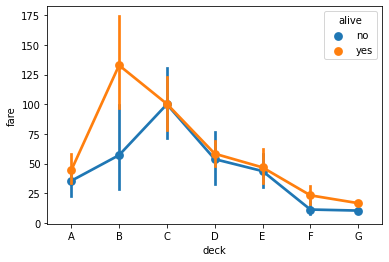

In [13]:
sns.pointplot(data=df, x="deck", y="fare", hue="alive")

## 13. lmplot으로 x축에 age 값을 y축에 fare 를 그리고 class 에 따라 다른 색상으로 표현되게 합니다.
* 나이와 요금에 따른 상관관계를 봅니다.
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAaUAAAFgCAYAAAAb92apAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0
dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOzdeZxcVZ3w/8/33tp7X0PSCYRAAE1Y
1IDLABMRZ1AZdBzcxkfRHw7MjNsz/nRwfBx0GB8fHRwd9HEcGJ0Bd9zNoKOigOCCGFAgIYGEQEg6
SXen96793nueP+6t6uru6jVd3beT7/v16ldX37pVdaoC91vnnO/5HjHGoJRSSoWBtdwNUEoppUo0
KCmllAoNDUpKKaVCQ4OSUkqp0NCgpJRSKjQiy92AY3HZZZeZH/3oR8vdDKWUmkyWuwEr1YruKR09
enS5m6CUUmoRreigpJRS6viiQUkppVRoaFBSSikVGhqUlFJKhYYGJaWUUqGhQUkppVRoaFBSSikV
GhqUlFJKhYYGJaWUUqGxossMKQXw6Z8+wed/8RTpgkvctmiti4II61pSXHvxBrae1bncTVRKzZH2
lNSK9umfPsFNd+0lW3SxMGSKLgeHcuSLDr2jOa7ftpN7dvcudzOVUnOkQUmtaJ//xVNYAhHLwjXj
VTD700VSsQhRW7j53n3L2kal1NxpUFIrWrrgYgWRyJjx415wOxm1OTiYWfqGKaUWRIOSWtHqYnY5
AEnFZgGlQJUtuqxtSS19w5RSC6JBSa1ob7vwVDwDjudhC5Q6S211UTIFh6JruPbiDcvaRqXU3Gn2
nVrR3nXpGQDl7LtU1M++ExE6GxKafafUCiOmciB+sZ9c5GlgFHABxxizRURagduB9cDTwGuNMYMi
IsBNwMuBDPAWY8xDMz3/li1bzPbt22vWfqWUWiDdeXaBlmL47sXGmPOMMVuCv98P/MwYsxH4WfA3
wMuAjcHPNcDnlqBtSimlQmQ55pReCdwW3L4NeFXF8S8a3/1As4isXob2KaWUWia1DkoG+ImIPCgi
1wTHVhljDge3jwCrgttdwIGKxx4Mjk0gIteIyHYR2d7X11erdiullFoGtU50uNAY0y0incCdIrK7
8k5jjBGReU1qGWNuAW4Bf05p8ZqqlFJqudW0p2SM6Q5+9wLfBS4AekrDcsHvUg2YbmBdxcPXBseU
UkqdIGoWlESkTkQaSreBPwJ2ANuAq4LTrgK+H9zeBrxZfC8AhiuG+ZRSSp0Aajl8twr4rp/pTQT4
qjHmRyLyW+AbInI1sB94bXD+D/HTwffip4S/tYZtU0opFUI1C0rGmH3AuVWO9wMvqXLcAG+vVXuU
UkqFn5YZUkopFRoalJRSSoWGBiWllFKhoUFJKaVUaGhQUkopFRoalJRSSoWGBiWllFKhoUFJKaVU
aGhQUkopFRoalJRSSoWGBiWllFKhoUFJKaVUaGhQUkopFRoalJRSSoWGBiWllFKhoUFJKaVUaGhQ
UkopFRoalJRSSoWGBiWllFKhoUFJKaVUaGhQUkopFRoalJRSSoWGBiWllFKhoUFJKaVUaGhQUkop
FRoalJRSSoWGBiWllFKhoUFJKaVUaGhQUkopFRoalJRSSoWGBiWllFKhoUFJKaVUaGhQUkopFRoa
lJRSSoWGBiWllFKhoUFJKaVUaGhQUkopFRoalJRSSoWGBiWllFKhoUFJKaVUaGhQUkopFRoalJRS
SoWGBiWllFKhoUFJKaVUaGhQUkopFRo1D0oiYovI70TkjuDvU0XkNyKyV0RuF5FYcDwe/L03uH99
rdumlFIqXJaip/RuYFfF3x8HPmWMOR0YBK4Ojl8NDAbHPxWcp5RS6gRS06AkImuBVwCfD/4W4BLg
W8EptwGvCm6/Mvib4P6XBOcrpZQ6QdS6p/QvwN8CXvB3GzBkjHGCvw8CXcHtLuAAQHD/cHD+BCJy
jYhsF5HtfX19tWy7UkqpJVazoCQilwO9xpgHF/N5jTG3GGO2GGO2dHR0LOZTK6WUWmaRGj73HwBX
iMjLgQTQCNwENItIJOgNrQW6g/O7gXXAQRGJAE1Afw3bp5RSKmRq1lMyxvydMWatMWY98HrgLmPM
G4G7gSuD064Cvh/c3hb8TXD/XcYYU6v2KaWUCp/lWKd0HfAeEdmLP2f0heD4F4C24Ph7gPcvQ9uU
UkotI1nJnZEtW7aY7du3L3czlFJqMs0cXiCt6KCUUio0NCgppZQKDQ1KSimlQkODklJKqdDQoKSU
Uio0NCgppZQKDQ1KSimlQkODklJKqdDQoKSUUio0NCgppZQKDQ1KSimlQkODklJKqdDQoKSUUio0
NCgppZQKDQ1KSimlQkODklJKqdDQoKSUUio0NCgppZQKDQ1KSimlQkODklJKqdDQoKSUUio0NCgp
pZQKDQ1KSimlQkODklJKqdDQoKSUUio0NCgppZQKDQ1KSimlQkODklJKqdDQoKSUUio0NCgppZQK
DQ1KSimlQkODklJKqdDQoKSUUio0NCgppZQKDQ1KSimlQkODklJKqdDQoKSUUio0NCgppZQKDQ1K
SimlQkODklJKqdDQoKSUUio0NCgppZQKDQ1KSimlQkODklJKqdCoWVASkYSIPCAiD4vIThH5h+D4
qSLyGxHZKyK3i0gsOB4P/t4b3L++Vm1TSikVTrXsKeWBS4wx5wLnAZeJyAuAjwOfMsacDgwCVwfn
Xw0MBsc/FZynlFLqBFKzoGR8Y8Gf0eDHAJcA3wqO3wa8Krj9yuBvgvtfIiJSq/YppZQKn5rOKYmI
LSK/B3qBO4EngSFjjBOcchDoCm53AQcAgvuHgbZatk8ppVS41DQoGWNcY8x5wFrgAuCsY31OEblG
RLaLyPa+vr5jbqNSSqnwWJLsO2PMEHA38EKgWUQiwV1rge7gdjewDiC4vwnor/JctxhjthhjtnR0
dNS87UoppZZOLbPvOkSkObidBF4K7MIPTlcGp10FfD+4vS34m+D+u4wxplbtU0opFT6R2U9ZsNXA
bSJi4we/bxhj7hCRx4Cvi8hHgN8BXwjO/wLwJRHZCwwAr69h25RSSoVQzYKSMeYR4DlVju/Dn1+a
fDwHvKZW7VFKKRV+WtFBKaVUaGhQUkopFRoalJRSSoWGBiWllFKhoUFJKaVUaGhQUkopFRoalJRS
SoWGBiWllFKhoUFJKaVUaGhQUkqp44iIfFhE3rvc7VgoDUpKKaVCo5YFWdUKds/uXm6+dx8HBjOs
a0lx7cUb2HpW54znPtEzQtE1xCIWGzsbZnyMCo/5/Fur8BGRNwPvxd/Z+xH8zVRL9/0FcA0QA/YC
bzLGZETkNcCHABcYNsZcLCKbgP8MzrWAPzPG7FnSNwPISt4dYsuWLWb79u3L3YzjRunitKd3lNGc
Q0sqSnt9nGzRpegarnxuF7/eNzDh4gVw/badFByX/nTBfyID7Q0xorbNDVds0gtciN2zu5frt+0k
agvJqF3+t9Z/t2MmS/IifiD5LvAiY8xREWkF3gWMGWM+ISJtxpj+4NyPAD3GmM+IyKPAZcaYbhFp
NsYMichngPuNMV8RkRhgG2OyS/E+Ks1p+E5ELhSRtwa3O0Tk1No2Sy210sWpdzRHJu/gGUN/usBo
ziEVi1BwXD57z5P0juZoTkbpHc1x/badfOy/dxG1hdGcg4UQsSwsSxjJOkRt4eZ79y33W1MzuPne
fURtIRWLIOL/1n+3FeUS4JvGmKMAxpiBSfdvFpH7giD0RmBTcPyXwK1BT8oOjv0a+ICIXAecshwB
CeYQlETkQ8B1wN8Fh6LAl2vZKLX0Ki9ORc9gW4KFcHQsD8BozsHxvCkXr6f6MySjNgXXQ4LvhiJQ
cD2SUZuDg5llfFdqNgcG/X+/Svrvdly5FXiHMeZs4B+ABIAx5i+BD+Lv9v1g0KP6KnAFkAV+KCKX
LEeD59JT+lP8hqYBjDGHgIZaNkotvcqLU8y2MGY8uADkHY+4PfE/l9L52aJbfgyAMf5zZIsua1tS
S/cm1Lyta0mRLboTjum/24pyF/AaEWkDCIbvKjUAh0Ukit9TIjjvNGPMb4wx1wN9wDoR2QDsM8Z8
Gn9H8HOW5B1MMpegVAi2JTcAIlJX2yap5VB5cepoiGMMuMYQsy0yBQfbEppS0QmPyRZdNrTXUXQN
DYkIHgbH8/A8Q2MyQtE15XknFU7XXryBomvIFByM8X/rv9vKYYzZCfxv4Oci8jDwyUmn/D3wG/zh
ut0Vx28UkUdFZAfwK+Bh4LXADhH5PbAZ+GKt21/NrIkOQb77RuClwP8B/j/gq8aYz9S+eTPTRIfF
M3nCuz+dZyBdpCFus3FVIy/c0Mq3HuquOiEO/vDfnp4RCpp9t+KUElwODmZYq9l3i2VJEh2OR3PK
vhORlwJ/hP9B/9gYc2etGzYXGpQW12wXJ714KTVnGpQWaMagJCI28FNjzIuXrklzp0FJKRVSGpQW
aMbFs8YYV0Q8EWkyxgwvVaPUyqSLMGemn49Ss5tLRYcx4FERuZMgAw/AGPOumrVKrTiVc1KV65hu
AL3wop+PUnM1l+y77+BncNwLPFjxo1SZLsKcmX4+Ss3NrD0lY8xtS9EQtbIdGMzQnJyYMq6LMMfp
56PU3MylosNGEfmWiDwmIvtKP0vROLVy6CLMmenno5aDiLgi8vuKn/UiskVEPj2P52gWkb+uZTsr
zWVO6T/xq8l+Cngx8FZ0yws1ybUXb+D6bTvJFJwJ65h0EaZPPx81m/Xv/8FlwPuAU4GngBuf/tgr
fnSMT5s1xpw36djTwJS0ZRGJGGOcKs/RDPw18K/H2JY5mUtwSRpjfoafPr7fGPNh4BW1bZZaabae
1ckNV2yisyHBcLZIZ0NCK01X0M9HzSQISJ8FVgMDwe/PBscXlYhsFZE7gtsfFpEvicgvgS+JyCYR
eSDoVT0iIhuBjwGnBcduXOz2TDaXnlJeRCxgj4i8A+gG6mvbLLUSbT2rUy+yM9DPR83gfUAeKE0y
ZiqOH0tvKRmUDQJ4yhjzp1XOeTZwoTEmG2xfcVPl9hXA+4HNVXpcNTFtT0lEvhTc/B6Qwt+j43nA
m4Crat80pZQ6YZzKeCAqyQTHj0XWGHNe8FMtIAFsq9imYtm3r5hp+O55IrIGv7JsFP8D+v+BtwFP
LEHblFLqRPEU/pf/SqngeK1Vrj9d9u0rZhq++zfgZ8AG/HVJgl8pvPRbZ2iVUmpx3Ig/pwR+ByAF
xIPjS6Zy+woRORl/+4qHWcLtiqYNSsGeGp8Wkc8ZY/5qqRqkls/xXAZnPu/teP4cVDg9/bFX/Gj9
+3/wdhY/+26+Xgu8SUSKwBHgo8aYARH5ZbDNxX8bY95XywbMqUp4WGlB1sUzeeuKyq0pVvoFeT7v
7Xj+HNSS0oKsC6TrjRRwfJfBmc97O54/B6VWAg1KCpi4HXrJ8VIGZz7v7Xj+HJRaCTQoKeD4LoMz
n/d2PH8OSq0EGpQU4JfBKbqGTMHBGP/38VIGZz7v7Xj+HJRaCTQoKeD4LoMzn/d2PH8OSq0Emn2n
lFKLT7PvFmgute/UcSIM62+qtQFY9nZVE4bPS6ljJSL/C/hzwAU84FpjzG+W8PW3Au81xlw+p/O1
p3RiCMP6m2ptGM4WEaAxGQ3VuqAwfF5qRZt/T+nDTVO2ruDDw8e0eFZEXgh8EthqjMmLSDsQM8Yc
OpbnnWcbtjKPoKRzSieIMKy/qdaGsbzDaM4J3bqgMHxe6gTiB6QpW1cEx4/FauCoMSYPYIw5aow5
JCLPE5Gfi8iDIvJjEVkNICKni8hPReRhEXlIRE4T340iskNEHhWR1wXnbhWRe4JNYHeLyFdERIL7
LguOPQS8ej4N1qB0ggjD+ptqbXA9g+N5y9quasLweakTSrWtK/LB8WPxE2CdiDwhIv8qIn8oIlHg
M8CVxpjnAf8B/O/g/K8AnzXGnAu8CDiMH1TOA84FLgVuLAUx4DnA/8Tf/mID8AcikgD+HfgT/J0l
TppPgzUonSDCsP6mWhtsS4hYE/8zDMO6oDB8XuqEUpOtK4wxY/iB4RqgD7gduBbYDNwZ7LX0QWCt
iDQAXcaY7waPzRljMsCFwNeMMa4xpgf4OXB+8BIPGGMOGmM84PfAeuAs/L2b9hh/fujL82mzBqUT
RBjW31RrQ308QkMiErp1QWH4vNQJpWZbVwTB5B5jzIeAdwB/Buys2GfpbGPMHy3w6fMVt10WIXmu
ZkFJRNaJyN0i8piI7BSRdwfHW0XkThHZE/xuCY6LiHxaRPYG2/A+t1ZtOxGFYf1NtTZ84spzufHK
c0O3LigMn5c6odyIv1VFKTAtytYVInJmsKV5yXnALqAjSIJARKIisskYMwocFJFXBcfjIpIC7gNe
JyK2iHQAFwMPzPCyu4H1InJa8Pcb5tXmWmXfBWOOq40xDwXdwgeBVwFvAQaMMR8TkfcDLcaY60Tk
5cA7gZcDz8ffkvf5M72GZt8ppUIqLNl3z8OfP2oGHGAv/lDeWuDTQBN+7+ZfjDH/HgSwm4F2oAi8
JmjLPwEvw99L7yPGmNsnZ9WJyP8FthtjbhWRy4B/wR+CvA84LXQp4SLyfeD/Bj9bjTGHg8B1jzHm
TBG5Obj9teD8x0vnTfecGpSUUiGli2cXaEnmlERkPX6Wxm+AVRWB5giwKrjdBRyoeNjB4Njk57pG
RLaLyPa+vr6atVkppdTSq3lQEpF64NvA/zTGjFTeF2RmzKurZoy5xRizxRizpaOjYxFbqpRSarnV
NCgF+fDfBr5ijPlOcLinYqHWaqA3ON4NrKt4+NrgmFJKqRNELbPvBPgCsMsY88mKu7YBVwW3rwK+
X3H8zUEW3guA4Znmk5RSSh1/almQ9Q+ANwGPBgu0AD4AfAz4hohcDewHXhvc90P8zLu9+Bkbb61h
25RSSoVQzYKSMeYXTJ+B8pIq5xvg7bVqj1JKqfDTig5KKXUcEpE2Efl98HNERLqD20Mi8tg0j7lB
RC6dw3OvF5Edi99q3U9JKaVC4ezbzp6yePbRqx5d8OJZY0w/fgUHROTDwJgx5hPBEp07pnnM9dWO
i4htjHGr3bfYtKeklFLLLAhIU7auCI7Xgi0i/x6UgPuJiCQBRORWEbkyuP20iHw82H7iNcF2Fw+L
yMPUcKpFg5JSSi2/Wm1dMZ2N+FtUbAKG8Iu0VtNvjHmuMebrwH8C7wy2tagZDUpKKbX8arJ1xQye
MsaUsqIfxN9yoprbAUSkGWg2xtwbHP9SjdqlQUkppUKgZltXTGOuW06ka/T609KgpJRSy68mW1cs
FmPMEDAkIhcGh95Yq9fSoKSUUsssyLJ7O/72463B77cfS/ZdDbwV+GxQDKFmVdCXbOuKWtCtK5RS
IaVbVyyQ9pSUUkqFhi6eVaF1z+5ebr53HwcGM6xrSXHtxRtCsR15WNul1PFAe0qzKDge2cKSLGRW
Fe7Z3cv123bSO5qjORmldzTH9dt2cs/u3tkffAK2S6njhQalWRRcj8PDWfb3pzk6lidX1AC1FG6+
dx9RW0jFIoj4v6O2cPO9+7RdSh3HdPhujlzPMJItMpItErEskjGburhNMmrjbx2lFtOBwQzNyeiE
Y8mozcHByesLl1ZY26XU8UJ7SgvgeB6juSJHhnPs78/QN6o9qMW2riVFdtJnmi26rG2ZvL5waYW1
XUodLzQoHSPPGEZzRQ4NZXmmP0O/DvEtimsv3kDRNWQKDsb4v4uu4dqLN2i7lDqO6fDdInI8j+Gs
x3AwxFcXt6mLR0hE7eVu2oqz9axObsCfwzk4mGHtMWa5VcuYI3j++WTRLXa7FoNmA6rjiS6encVY
3qF3JDfn8x/YN8DXf3uAwyNZ6mIRMIZMMLxzzUUb+KPNJ9WwtUtntgthmC6UpYy5qC0kozbZostw
togAjclo+VjRNdxwxaYVdUGv9t5W4vs4DulE8wLp8N0iemDfADfdtYf+dB5bYH9/mv0DGSyBnpEc
H/qvnXzztwdW/BDfbGnRYUubrpYxN5Z3GM05Kz6LTrMB1fFGg9Ii+vpvDxCx/G+sg5kiliVYIgxm
iiSjNhFL+MpvnmE4689B7e9P0zuSYyzv4Horp8c624UwbBfKA4MZkpOGUF3P4HjehGMrMYuu2ntb
ie9DqRKdU1pEh0eyNCb8j7ToeliWlG8DJKIWR0ay5fNdzzCWdxjLO8H9NnWxCKm4TdQO7/eF2dKi
w5Y2va4lRe9ojlRs/D932xIwE0dYVmIW3bqWFE/3jzGSdSi4HjHbojEZYX1b/XI3TakFCe+VbwVa
3ZgkV/QDUNS2MAaMoRxgckWPkxqT0z4+V3TpT+c5MJDh4GCGoUyBguNNe/5ymS0tOmxp09Uy5urj
ERoSkRWfRffCDa30jhYouB6W+Iu9e0cLvHBD63I3TakF0aC0iF5//jocz5AturSkoniewTOGllSU
bNHF8QyvP3/dnJ6r4HgMpAscHMxwYCDDYDo8AWq2tOiwpU1vPauTG67YRGdDguFskc6GBJ+48lxu
vPLcCcdWYnLAr/cN0FEfI2ZbeAZitkVHfYxf7xtY7qYptSCafTeLhWbfHRnJ+sNFQfbdSY1JXn/+
Oi44xm+wUduiLh6hLm4Tjyxfqnkpu266tOjZ7leL48KP30VzMjqhqogxhuFskfuuu2QZW3bC0+y7
BdI5pUV2wYbWYw48Mym6HkOZAkOZ5Q1QW8/qnDHIzHa/WhzV5stW4tyYUiU6fLeClQJU92C2PMRX
SqpQJ4awDZUqday0pzSDXz15lM/ctZczV9WzuauJZ61unJJ+GxZF12MwU2AwUyAWsaiLRUjG7JpV
kwjb4thSW+pjfoHc0byz7O1aCmGsMKHUsdA5pRn8808e5zN37S3/bQlsXNXA2V2NbO5qYvOaJlrr
YjV7/cUQsSxScZv6RSx3FKYqApVtcVyP7iF//q+rOUHEtmZs11IHszAFclVzOqe0QBqUZvCrvUfZ
9vAhHnhqgKeOpqn2Sa1tSbJpTSNndzWxuauJdS3J0G5lEbUt6uMR6hORY1oH9YZb7p8yj5EpOHQ2
JPjaNS9YjKYuqC37+sZwXAMCEUvY0FE/bbuOJZgtRJgCuVoS4bwIrAA6fDeDF53ezjnrmv2qCzmH
nYeH2dE9wiMHh3m8Z5SC43FwMMvBwSw/3tkDQHMyyqYuP0id3dXE6Z31oVkIWznEl4j6xWLrYjaR
ebYvTItjK9tScD1sEQjW68zUrsqqE/v6xsqPOzpWKAezm+/dt2gBo/L1AFKxyKK/hlLHAw1Kc1Sf
iPD8U9t4/qltgL+O6ImeUXYcGmFH9zA7uocZyTkMZYv8cm8/v9zbD0A8YvGs1Q1sDoLUs1c3Uhdf
/o89V3T9xbpAPGpTH/N7ULY1+xe8MGV8VbYlZlt+Twl/vc5M7VpoMFuoMAVypcJs+a+OK1QsYvnz
Sl1NcP46PGM4MJDh0W6/N/Vo9zCHh3PkHY/fHxjm9weGAX9eakN7PZu7xof8Ohriy/pe8kWXfFBN
IhUEp7rY9DvqXnvxBq7ftpNMwZkwFLUcGV+VbWmvj/nDcAZOaozPmIm20GC2UGEK5EqFmc4pzWK+
i2crHR3LlwPUju5hnuwbo1rd1VWN8fJw3+auJk5pS2Et87yUJVJOkKi25XuYFsdWtqUUTMfyzozt
0jklVWM6p7RAGpRmcSxBabJMweGxQyP+vFT3MLsPj5CrUjqoIREZT55Y08SZJzUQiyzfvJRtSTlB
YjmrSCy2hQSzxXq95Q7kquY0KC2QBqVZLGZQmsxxPZ7sS/NI0JPa0T3MYKY45byoLZx1UkM5DX3T
mkYag/mJyk0FV1cpZTTb/fNVyuBLxmziESt0mYaf/ukTfP4XT5EuuNTFbN524am869IzlrtZ6sQT
rv8xVhANSrOoZVCazBjDoaEcj3QPs7N7mEe7hzkwmK167vq2FKsaEuzuGSUV9bdezzsGxzO8+5KN
XLChtbzpYMQSElGLXNGbcP+xEvGfNxn1F+ku97bvn/7pE9x0114s8efuPOP/vPuS0zUwqaWmQWmB
NCjNYimDUjWDmUIwLzXEju4R9vSOVd0QsLS5oG0JnQ1xPvvG5/K+bz5Cfzo/oQpFtujSVhfnk687
d9HbWouFuvNxzod/TLboErHGhzodzyMZtXnkw3+85O1RJzQNSguk2Xch15KKcdHGdi7a2A74qdy7
Do+w49AIX7l/P45n8Aw4nmE02CxwKFvklZ/9JY7r0ZCIYIwhEbWxgp5N5UaDi8nxPEayHiPZIhHL
772lYhES0aUZ5ksXXCZPvVniH1dKrQwalFaYRNTmOSe38JyTW/jd/iGOjuWwRMgWXXJFj0zBwTWQ
CS7E/eki4M9TJSIWUduirT7GUKZAc2pxSiRNN281nPUYzhb9TL6YTTLmB6m5rIWC+ZflqYv5WW2V
T+8Z//jxTMsXqeOJDt/NYrmH72ZSbc6o6Hq8+QXrsW3hrl29PPjMIE61PHRgXUuSVY0JekZyZIou
a5uSvOGCk+c13zTfeSsRf5hxtrVQC0mhnsuc0lJfwGv9eppqHlo6fLdAGpRmEeagBBM3Fay2keAD
+wb48m/2c3AwQyxik4zaHBrOUnSr/7sLEI9anNyS4qoXrueFp7fN+Prvuf3hBc9bSdCDSlXpQS20
vt5M2XdLfQFfitcLUx1CNYEGpQXS4bsVbrZNBavdX3A8Hj8yyj/8104GJqWgGyBX9Hiid4wPfn8H
Gzrq+IPT2tnc1ciz1zROuPgBHB7J0piYeGyu81bGGNJ5h3TeAfLEozZ1QYBaaFmed116xrSZdktd
f24pXk/LF6njjQalE1AsYnH22iZG8w5Ry++xFKr0nAzwZF+aJ/vSgD8kdlpHfbnyxNldjaxuTE7p
KeWKHic1JufdrnzR5b7H+/j6bw/QO5KjbzTHqoYETcHc17GW5VnqC/jk1xvNFekdyfF0f4Y33HL/
ogzlafkidbzRoDSLRMSirT6O4/pzJUXXw3EN3goe9pzMn9eZ+H5ObUuRLbqMZIusaU6VSyTt6R1j
T+8Y3/ldNwCtdTGyBYdE1KYxEcH1DK6B15+/bt7tqJyfaq+P0TOSp3soi+t5RCM2rnds9fWW+gJe
+XqjuSKHhnIYDImIRe9ojrvWa3UAACAASURBVOu37eQGOKbAFKY6hEotBg1Ks4jYFk3JqSV+3FKA
8gyuayh63vixFRK01jUn2T+QYXJBvqjlV25wPMMZqxr55OvOZSzvsOvweB2/XYdHyTseA+kCANmi
x2CmiG0JZ3TWs68/TV3C5oxVDXPeuuPrvz1QXm8FNtIk9I3m6R0rsGl1E68/fx0bOurpH8tTt4C1
UEt9Aa98vd4RPyABtNfHF20oT3eeVcebmiU6iMh/AJcDvcaYzcGxVuB2YD3wNPBaY8yg+F/VbwJe
DmSAtxhjHprtNZYi0WGhPM8PVI5rcNzx20XXwzOm6gLYpfbAvgE+/uPdpAtOEEj92dnVTXFsy5ox
i67oeuzpGWPHofGq6MPZqSWSYhGLs05qCIb8Gtm0uon6RPXvQm/49/tpTESQijlig2E05/DVv5g6
aV9arJuI2uWFw7NZ6vpzpdd74OkBEhGL9vp4uUSUMYbhbJH7rrukZq+vlo0mOixQLYPSxcAY8MWK
oPRPwIAx5mMi8n6gxRhznYi8HHgnflB6PnCTMeb5s71GmIPSbIwxFFyPomsoOt6EAOZ4U4u01kpl
9l4qaoMImYJTNZNvJsYYDg5my1t37Dg0zMEqJZIEOLW9rjwntbmriVWNCeDYMvnAX8NVWg8VtsKx
miV3wtGgtEA1TQkXkfXAHRVB6XFgqzHmsIisBu4xxpwpIjcHt782+byZnn8lB6WZGOPXsCsFqMqe
1lIHrWMxkC6wI6jht+PQCHt6Rqtu3dHZEGdzVxMN8Qi/fPIoiYhFMmYfU60+2xK/Hl/EJh61lr14
rK4nOuFoUFqgpZ5TWlURaI4Aq4LbXcCBivMOBsemBCURuQa4BuDkk0+uXUuXkYgQtQW/wzD1G3+p
l1UaDixWBC/XC898VmtdjIvP6ODiMzoAv9ez67C/U++jB4d57PAo2aJL72ieu3b3lh9niT+X15aK
8SfnruG8k5vn/dquV5luTlBiyR/mS8XtJd+iXud+lJqbpe4pDRljmivuHzTGtIjIHcDHjDG/CI7/
DLjOGDNjN+h47SkdK88LelpeELBKw4SuX/EhLFzP8GTfWNCb8uelSokTlSKWcMaqhvJw3+auJpom
pXbPVyziVzePR20SEYvIEgepEi0RdNzSntICLXVPqUdEVlcM35W+HncDlTnEa4NjagEsS4hZQoyp
F1pjTLlnVQx6Vo7rkXcmBqxj3YdpLo+3g2BzxqoGXv1c+M2T/XzyZ0/gun5QzRTcILgaHjs8wmOH
R7h9+8HyY5uTUS45q5P1bXX8ZOcRjozmpn2tadsTJGdEbX/IMDFNkKpF8Kgc0mtORhctTVyplWyp
e0o3Av0ViQ6txpi/FZFXAO9gPNHh08aYC2Z7fu0pLa5SwLp7Vw//+INdRGwhHrHK8x9zndtZ6D5O
1RIdxvIO8YjN+ae2cP++AZ4ZqL7Q1RJIxWwilkXEFv7mJWeUSyQtpD0RyyIRs0hEbX7zZD//+INd
C5oPmimYafLDcU17SgtUs56SiHwN2Aq0i8hB4EPAx4BviMjVwH7gtcHpP8QPSHvxU8LfWqt2qekv
lCJCLCLc+uv9xKNW+WIZi9ik80W++/turnjOmlmHBCeuN6J8If/6bw/MGJQOj2SxBQ4M5im6HlHb
oiUVJVt0+Ms/PI0njoyRzhUYzbvlIrOlxAnPwFjeBfzq6H+/bQfPObmFzWsa+cWeo1jCvNrjeB5j
OY+xnMNn734SMERtfwFvPGJjzOxrjGbrCWmJIKWmqllQMsa8YZq7XlLlXAO8vVZtUePmMmRU7WKZ
ikU4NJSdUvsOxntYBdej4Hj0jOZoiM+/Hl5dLML+/jSWJViW4HiGnpE8p7TVAfB0/xhjeQdBiFiC
MZSTOjrrY2SLHtmiW95j6sH9gzy4f7D8/PFgHikZtUnE5r6vVKm+n1dOHTTYlvD00TH6x/LlXXcn
r5OarfadlghSaqrlmd1Vy6byQulX6Y4QtYWb791XPmddi19iqNJMF0u/h2Wx/akB3v6VhxhIF3hm
IEPecYna/vxMwTWsaU5izZSWXRpKNhU/FcdLlc0tSxDxA1fJaN4hW3SI2kJrKsIprSmuOHcNGzrq
yufkHY+hbJHDIzmeOpqhZyTP+775CP/96GGeGcgw3VD26sYkueJ4bzBdcNjfn+FousDVt27nv35/
iP39aQ4MZOgdzTGcKZItuDwzkJ4wFAkTe0LXXryBomvIFByM8X/PVGHint29vOGW+7nw43fxhlvu
556KjEWljhdaZmgZLGfG1VyGjBZSjqeyB3ZSY5zuoRzdQzm6mv30bmPgXZdsZH17HcYYfrarh1vu
fYqDgxlWN/mJB+miy6rGOIOZYsXwXYxMECBjEYt80cUzBpHxGAZ+hQkR/3fe8XjluV286UXrAfj5
7j4+ffceckWXbEVwMcCDzwzy4DN+b6o5GWVTVyNndzVxdlcTp3fWE7UtXn/+Om66aw/ZoovrefSM
5AFY1RinP53nprv28G78+ami6zGGn4beUZ9gIJMnFYtgiSAC2YJTDu7zSRPXpAh1otCgtMSW++Iy
05BRZbBsiEfKZXDmsqbm5nv3UXRd+sccCq6HLf5F/8hIng3tdUQtwwe/v4N196Z44YZWvvVQt9+r
qYsxlC3wmbv30pKMknc9Tm2PY4xfKS5TcGhNxQE4pbWO7qE0Y3m3HLRKkSliW35gAmyBLz/wDL87
MMzrz1/HH57VwTMDaW67f/+ENkcswRJwjZ+ePpQt8su9/fxybz/gD/c9a3UDm7uaeNmmk/jt04Ps
7hnBtoX2ujj18QhjeYf+dJ6/37ajXJ+vNE9VCmbpvDMhweLK53bRP5YnFvHbXHqvM5nvNhjTffHR
FHQVdrrJ3xJb7oyr6SoLXPncrnKgmC7DbKYN9LZ85E6GM8VgaM2PFZ5nSMZsmlOxCc97cDBLSypK
R0NiwmcQtYRM0ZvShg//ybN50ent3L2rl4/8cBcRC+IR//7uoSwnNcapj0f9DRlHcwh+4sOa5iSO
Z7js2av40WM9HBnOTbj4RyzAQH0iwidfd55fHimoQHF4eOrGjv6OtkJd3CYVtfEM9KfzU16vMquv
2iaM4CeD7B9IM5or+tFb/DT3uniEj/3pOew6PMwXfvl0+bMGOLk1NaEqxXS18+byb+y4fo+v6Hls
7Kjn/S97lganxaXZdwukPaUlttwZV9MNGc32Tbxyq/GI5feubrprL+BvrFdwPAgu2gAi4IkhXXDp
aBh/Xsc15B3/gjiac8oFSpNRm+FskX985eYpbQN463/+NujB+Vuoj+X9YbBU1J+vsi1hMFPAQjAC
sYoL8jcePEhrXWzKZ+F6YFv+XNX6tjrWt9Vx+TmrATg6li8Xmt3RPVzeusMzhuGsw3DWKT+PCETE
73XZArfct6+8JqouFoGKntDjR0b40WM9RCxhLFfECUYTI4DnwXCmyN9+62FG8k75+TIFB8eD7sEM
a1vH58imm+eb3GuN2RaNyQif/8VTdDTEcT3D4eE8ImCL8PRARocCVWhoUFpiYci42npW55SLzwe/
v4NL7If5s+HvsMrrocdaxbcTr+buQb8Q6ud/8RRvt7/D1dYPqSNLmiRf8F7O53/xGt516RlEbWGL
83uukTtYK70cNJ3cIpdzt3tuebJ/JFvk0HCW0u5Njms4NOxnwEVsYW1Lakrb7tndyx3f+SJ/636P
1aaXw4VOvmK/istf/ebycNT123b6ZZc8f65JEDob4kRsizqB7iF3SsIBjOdRxOypX2rb6+NsPbOD
rWf6JZIyBYddh0f50Y4j3LfnqD/sVnoeA0Vj2D+QLfcSm5IRIpbw9NE0IuPzT19+4BmakxEa4nEq
prdwTdAOzzCUc4hYYFt+HpIt4Hoeg1mHhmyBZNQm53i4ruGtL1qP65kJmX97ekfLvVY7yGI8OlrA
NYaTW1M8FbTJEsHgD12Wkl00KKnlptl3S2y+GVdL5fLkTv4y/TlavAFGqafFG+Av05/jFcmdAFzl
fJN3Wt8mQY4iNglyvNP6Nlc53wTgNU2Pc0PkVtpliEFTR7sMcUPkVi5LPFrO5Ds6lsdCiNjB5hTi
j3H0jOam/Qzu/8ntvKd4C21mkFHqaTODvKd4C/f/5HYg6PldsYnOhgSWCJYIa5oTNCZj2JZQ9Az1
8QiuMSSjFjbj4yqCn9xwSlv9rJ9PKhbheae08L9e8SxuuGIT53Q1YVt+wEhELeygh1gaDR/OOvSn
i3j4Q3u9o3l/A0TX34pjssmD6JOTFEtFz1tTcYazRVqSMd7x4tM5fVU9+/vT7O9Pc2goS99onnzR
xWD892mC3qv4WZLZokshSAoptTdmW7o+SoWG9pSWWFgLc14buYNhIuSJY4mQNXHiGK6N3AG8k7dF
fohnBC8oEOv/dnlb5Ifjj5cIrpUgIYJrbByT4wONd/LG4vPJFPyhJKHUk4kxlnfIOx5iZNrqCC8d
+jqORMmLP/+UJ1E+7u92Mt7zu2d3L+/71sMcGc5xcDBDxLJoSER424Wn8qX791N0PUqJ7rZAZ2Oc
iGXx11tPo60+Tr7oTim3VM0FG1q5YEPrhEoR8YgwlnfpGcmTjFoUPVNOYTeA48GhYJ4q5xh6RnJ+
DyiIRv681PieViaYZyoxBupi9rRbeLiewfVcckW33Gtyg54jngl2vBXyRQ8LcF0PSyw8DO31iWPq
rWvyhFpMGpSWQbXhs+XWUjhEpKmZvnSBguMRi1i01TXTUPALtdeTIx90rEvDby4W9eTKjx+LpShk
ndK8PalkinXSxw1XbAqCsD90d1JTgoZElE7Gkzym+zzWSR+DXh2V61KzJsY6q6/q+SZooAS9A1Nx
3LYtXOOV/25OxrjusrPGXzuY6yvVAiw4/u+841bdlPGCDa28m40TEhlSUZuiZ0hGbZ4ZSFP0DMYD
MymFfXhSb8ngJ4ak4hEuOKWZu584Cp43njRi4LXPW1v1PU+2vq2eg4Np0oXxLMXGWIS1LXW8/vx1
3HLfPp7uTyOWobMuBhhyRcObX3AKuaJLzLYmrAGbyXJnk6rjjwYl5Ws+hYbRHhraxyfSKWSgwd8e
xE7UE8ulKeJXUvBTrz3SJLj2lvu5odCKZHuBOFZwIc1n0xxIrJnQk7l+205sSzDGlLPCXrihlTfc
cn/Vb9rRtlOJ9x0gb/zhOc8Y4uSJtp065S3cfO8+mpJRVjcly8cyBac8wT/5eHMqVvXCGQkW/NbF
x4/lii75oh+gKntTpV5TSan3lC26tNbF6BnxEwpOaoyXh89OaU2xtzfNWN6ZMGznGhjNOfz6qUFO
akzQN5bHcf1hx9dtWVdedzWbUip6eywyIRW9lK5e6uWVgmlHKs7rz1/HmasbODQUzPFZFrYdbKES
1BOMRSxi9sR9qeabqq7UbDQoKd+L3g3//V4oANEkFLPgFfzjAC94O5F7/4kIBhcL13OwgO/FX0nv
aI6PDP0RN0ZvZg1HieDiiM0YST40/FI+F7xEtaHLyjVL1b5pt1z6XhLf/xv6cwXG3Cj1dpG2pEXy
0vdOeQvTZTamCy4nz1BZYS5KpYRgvDeVczyyBX/IrDJI/Z/eI7Q+8m+0F49wJLWK2yOv4ufmPE5q
SExYx+R6hn19Y+w45KeiP9I9TP9YgUzBJVMYr6iRdw33Pz3AWMEtbyvfnJqaTVhSrQc3uXL65GA6
meN5OB7kp+5wT9S2gh9h/0Ca5mQUY0w5WOn8lDoWGpSU74yXAp+AX90EQ89A88l+QDrjpf79W6/z
f9//WciNkifJ9+Kv4pv1f46b869c4/Mg49+kK8vzwNShyzfccv/M37TPeCnJV36KteV2rZ/YrgrT
ZTbWxfzU8MXMeIzYFvW2RX1Q48/1DLmii/vETzh5z8fx6qKYyCranSxne7dx9OIzyJ4ycR2abQkb
VzWwcVUDf/qcLozxa/35O/X6GyE+3Z/B9Qy7Do+y6/Ao33zwYPBek0GA8qtPrGlOTOjBzBZ0jkVl
Ed7O+sR4Zfcg8zHnOKxqTDCWd4hYQtS2ptQFVGo6unhWzduFH7+L5mQUEWE0V+TQUI5brRvokCGy
+GNegpAkR7/VwvM//Ks5PVfJdItCZ3MsC4MXavIk/786H6LFHcDEUuXEBVNI46Q6OfIqP1NxPntV
jWSLPHZ4hEcODrPz0DC7j4yWEygqtaSi5Q0Qz+lq4rSOugVtXDjffbTmui2IiJQDVNQWIqXflv97
Obeqr5Hj7g0tFe0pqXmr7JH0jfpzJuukj0HG56MMhiwxzooPzvBMi7tua6bMxnPWNi96xmO1Sf7s
2D4iTR004C9MtQWI1xEZ8xfw3rWrt3wRb0xEptTOK6kWHK65eAMFx+PxI6N+T6p7mJ2HRhjNOQxm
ity35yj37TkKQCJi8aw1jZy9xh/ue/aaxqoV3itVBpiZ2lZpLkOFMF5JfrrMRtsKAlXwO1IxlxWx
jsugpaahPaUTUOW3+/qYXyFhNO/MOZ238mK8vz+NJcJt9j/SKcNkTKw8ed9VZ2hbtY77Lr2OW3fe
SvdYN131Xbxl01sAuHXnrewdeIaR0Qbqci+hmXPoT+cZSBepj9t01PvJAb2RO3Dq7gErT12sjjc9
60381Xl/VdPPqNp7npz2fPO9+6YE1BuG3k8HQ6zt9DcYHM05DI8M02Oa+MRJ/8xgOk/B9UhGI3iT
6vuV0r3nsymhZwz7+zPlyhOPdg+XC8ZWsgRO66ivGPJrpK0+PuGcapssZosubXXxaVPRl0op8SIS
LAgu/Y7aFpEgkIWMRtEF0qB0gqkMKI7r0T3kp3R3NSeCoqZzG9Yq1cEbyfnlcC5P7uDv+A+KRMia
GAkpkBCH9yVfxo62h2lNpWhN1ZFzc4zmRzHG0JhoJGEnGMikGchkMP1/SmZoIy2pKPGIRfdQDrv1
p8Taf4af3y3YFiCGa8+5dkGBaSFraqYbFkzni6xuSk74Fv+c/G+5duxzdLU1MepG6R8eIobDv9X9
FXcWz+bwcL684WCpxJIxhqFMgR+8+2LSeYe//vJDxxQc+kbz5cSJnd0jPNk3VrXg6+qmxIQgdd23
H6EpGUUqrqcGf7HvV/8i3DvhWuIvyo4FmZOlHtYyDg9qUFogHb47wVSm8O7rG/MrEQgcHSuwoaO+
nGRQOrfaxfue3b1866FuOhritKSidA/l+GHubOL1b+PP3e/T6fVwiE6+HXs1jzX/Cs+zOTpqiNku
EKU/O4wxkM7W09Hg0lZXTypu02vupVXOmdC2aOt9GCNYYmMI5miM4V8f+k/ufeA55SoQc6mIPVum
31w+MxhPxii6ZkoCxS/lOaRa38n7G35M9sATDFqdfC95Jfeac+kf878AGDO1xNK61jqaklGaklH6
xnI0JKIY4wcFzNw2SSzpaIjz4rM6eXHwnsbyDrsOj9fx23V4lLzjcXg4x+HhHD95rAfwh9BGcg71
sQjJmE08YpF3PE5qTM70cqHgGUPBMX4NxipKw4Pt9THikaklp1R4aE/pBFOZWLD7yEg5KLme4ayT
GjHGcGQkV978r1piwORK56O5YrkC93NPbmEoU6DgeqRiEQ7UfxDLpDBeUKTVgBvpBoSIswaDX127
Pm6zu7eHk9MfKbcNA/Ez/g6MBcH3dz/Bz4B4dPbfxEi26Kdke6ZcA64+HuHNLziFL96/n7G8Uz7u
eob2+hjt9ROrk0+u0D65GroxhlPa6qYkY1R+TiPZgl9WyPhbXnTUxzg8kicRsWivj3N0LO/viOsZ
ip4hHrEwxmBZQmdDghuu2AT4AfChZwb9FGvANYaYbVGfiNDVnOKfX3vsw2hF12NPz9j4vFT3CEPZ
qbnfAkRt4UWntfPHm1exaXUT9YmV/T12dVOSZGxJgpL2lBZoZf8XpuatMrEgZls4QSZXLBiTzxZd
Co5HU3L6NO0DgxlsgX19Y+Uq1Ksa46TzfpWCJ3rHyhfjaKoNR4axJE7OcYPXsRHj7yDreYa+0TyR
iEVKOso9D0uEvOsRc2OIVSQIRT4xWCbuB72BDEXXv3DbIhgPhjJFPnPXHgwSJBv4x4uuYWCsMCEo
TV5TU60aetE1dA9lWNsysUL3xs4Grr14Ax/87iP0jfkXdVv8HW4PDuWICBRcj0PDWVzPEItYWCIk
Iv58SGWJJaA8RNiUiNA7VgD8NhQ9Q3+6yP94fgdrW1JkCy7Zov+zkC+VUdvi2Wv85IfXblmHMYaD
g1ke7R7m7t19PHpomILjF5wtuIZ7nujjnif6EODU9rrycN/mriZWNSYmPPd8s/eUmkyD0gmmclfZ
9vqYP6dk/IoDpSGpUg+pUuXFuz5ms7cvXb7gO67hwEAW2xZ6R3PEbSlfjNtjL8Zp/DYuecAGKWCZ
JBiDRx6RGAUvR9GN8qZn/QW33+cXqXWDLK3CwIXEO+4C4zFe4MjQUHiJf3/FFung98aMZyi4ELMn
HhfXX4haaXKm3+d/8VQQkPwgbQl4nstQ1qG1bupOvFvP6mQk75bTm/OOW26lB0QQShtXlEoVrWlM
0piMTiixVLle68hwjkjQs3M9SMX8Gn6/3jfAuy61iEUsmoiWq2Kk8y7ZgovjzVyzbzoiwrrWFOta
U7z8bH/rjoF0obxWasehEfb0jOIZ2Hc0zb6jabY9fAiAzoZ4OUhh4PbtB/yyRnPM3lNqMg1Ki+y+
g/dNyTS7aO1FNXve2V6v2v2vu2iML+26jYzpo6m1jYbcS3HTZ9LZkJg2q6zy4l0exhLKgxTlenex
CJ2NCQ4N5TAYRgZOp8W6knTiZ0SjA4jbSnv+SjJFh9HYTzGRASy3lcvXXM3bX/gnbGrx54Ge7EsD
4PRf6g8jtf4CsQsYN0azcykthVeU2zbXcZLSLrMzbfOeLrj+5n+ApHYhzT8nGR3ALbSQjF7O8MBp
U1LKKx9T2XHxN/5L0DuSw/UMlggtqSgNiciU6vCV1SgKrleeqHeNYUNHfdCbmVglQcQPYqV/p1zR
ry6RLrjkiy7HorUuxsUbO7h4o791R7bgsutIsAniwWEeOzxKtujSO5rnrt293LW7N2iT/wWm9GOJ
v6GhBiU1VzqntIjuO3gfH/3NR4naURJ2gpybo+gW+cDzP3BMgWm6573itCvY9uS2aV+v2uMmZ75V
a+N02WalOaULP34XdpAcURq+yzkeguFZq5sAf56pdyRH3jVcsL61fPG9fttOiq7L0dFCOZq01cWI
RewJWX9nfvC/McaU9xQCKDguroHTOurK7XpmIIPrGqIRq1y8tHIOya7YCdf1DCc1xlnXWjfteqVz
PvxjskWXaP3jWB3fAy+CMREsy2Fta6zqv2XpMaWekp+g4AfBTWuayj2iUsCv9tqV83T7+sZwPP9J
IraUE1Dmszux6/k9zmxQsshb5P/PXc/wZN9YkIbuJ1EMpAtVz43awquf01Ve3Ns0qRTUUtI5pfDT
oLSIrv7x1fRl+0hGxrOVsk6WjmQHX/jjLyz68x7NHqU92T7t61V73JNDTyIIG5o3VH1MSSlzbbYL
aMme3lEwsHFVQ/lYtQvpPbt7edfXf0em4BIP5p0qh7JK577sX+5lT+/YlKCyuinB2pbUhNp5X7p/
P6M5B8fzyttVvOkFp1Q9fuOV586YaVeaU4qvvQWJjECw7mpVQ4KGlFf137JyHgpjypv3ddRHaUzG
5pRmv1ip+tWUhvnG8g6Z/OIHqNJrvOOrv6Mn6BX6+zZVf51TWlMT5qVWNyWWLGVbg1L46fDdIuoe
66Yx1jjhWMJO0D3WDU/cGdSV2w/Np0xbv20+z5spZkjUJ6Yc7x7rnvZxrudOuQBUPqZkpu01rr14
A3d854u8MRPsBiud/Ef0T7jfem55aGxz5gFeU/guz/YG4dZTy+9361mdNCajnNyamtCOyQkH1112
Fu/71sN+UHH9oNKSivKPr9w8pV2V1RrqgsXA33jwIO31cdrqYqQL7pyrOLzr0jMA+PenB3DdJLYI
7fVxOhvjGGOmfE6Vjyll7KWiFq11foZjqYc02+tOrkaxsdMfsksX3Dk/x3Qqh/lM/eLMQ1V7jate
uL686LezMe6/RtHl7DVNHE0XeKJnFMcz7B/IsH8gww8e9bdFaauLBb2oRs7uauK0jnqtlXcC06C0
iLrqu9g/8Dij+RGKwc6fxrIRhKvvfQ9vKUS5KNECR5+Eb/wPiDdCx5lTAtTkeaC6qL/otLLHk3Nz
pKKpqse76rvG2zOyn9HCKEWvSNTyh008A7uPPomHg0WEhlgDZ7bNfefbrdbDPD96K/0uDHl1dNhD
/FPySzzxvA18bO861vTdx994n6e+ro5kXRuM9vgVyPkEnPHSOZUW2npWJzdeee6cSgNN3hqjtA6p
NOxYLZABE74o3Nfcwa1NTXR7Wbrquzijs4OiV5z2s53snLXNbFrTNKVKxnws6j5b03wJqjYPlSm4
jAU9ymMxW8mhfNFld88oO7tH/IW9h4ZJ51360wV+/kQfP3/C3yMrGbV59ppGNq/xg9SzVjcuVe9G
hYAGpUW0JdLKg/khxAAYiiLgObQboc+CjyZdPpAZ4qLsUX88qpCecsGunAdq9KDv8EOMeA5iWZBs
J5FqK88DvelZb2Lbk9sAJswPlcr4bFm1hQd7HkREsLEpeAUc4waz8f7G4B4Ow4UB2q1XTHwzM/Xs
fnUTyUSStY0V9ekKGc595ja+ds0dcOtHYLQRYsH9sZS/JcavboIzXjohA3C6hAPwg9/W2E0Q3w+x
U8B6NzB973Jee/s8caf/uVsx7kvV8VGvj+hAH42NXfRl+xjJjZR7ctU+20qVwdAW2BskaXQ1J5Zn
07uK90aiZcp/Y5VKW3K01sXIFlzSBX+Ib6EBaqbq5PGozblrmzl3bTN/jj8c+/TRdLBeyk+i6B3N
ky26PLh/kAf3+3UTLYGNnQ3lntTmriZa66bfukOtbBqUFtH2p++k3biMWhZZy1/saRvI4NEpUcBw
a6TARQhYNnjFKRfsWSOUgAAAIABJREFUW3feStSOknSKMNJNUgTEIu95HM30kskdJVVR/21z++Zp
s++292ynPdle7inFrBiOm/eDkniUcubES/HzA/ePv5FpLmr3DV7NrUMP0+3tp6suwlvcAhd5wcUh
mvS3lgA/kCVaJn44FfdvPauTKw8OTVig+rYLT5140Z7HhbVkuv2Uqu7t86ub/OeOpbg1MkJULJIY
SPeRbD8dEhCVKM2J5imf7eRKEUOZwoQqGZG6x7Fbf05/dICkdBBPX8LN9yYXvSL5tEN6Fe8NmPLf
2HSSMdvvkdSP96DSeWfW7eErzWedkm0Jp3XWc1pnPa88z++B9ozk2NE9zI7uER49NMxTfWk8A4/3
jPJ4zyjffsgfPu1qTk4IUutaklq09TihQWkRdZOn1TO0GZc9VgQrWJVfRMB4JETojkhpMQ3YFRf0
3t1w6+V0e/tptKLgucHiGosiLj0WnOxBwtjkku1se3Ibm9s3c9Hai6bN7Ose66Y10Upbsq187LGj
u/C7chEkWENjrBwZ79D4A6tc1O5zXT666z+INp9MoxWlzyvy0UiGDzj4gamY9fdgAr9nNdoz/niY
cP89u3t55oFt3GZ/j9UJf07qKw+8invWvnn8IjuXC+uk3tzlyT/mzuLZc6s4XhE4u8WjEUAscP0M
soSdYKQwwrf/+NsTHlatMvjT/f+vvTOPs+Oq7vz33Kp6S+/dUmtr2VixMbIdMDYmhljNMCxBjh2b
4EzABMbyB0IyIQkmzCcYZZmERTgzQ4AJSQaCsYAJq00CIQkkgRjLdiwbAwYkr5KtfemWeu/3Xm1n
/rj1Xr9eJbda7tfS/erz9KpubbeqXtev7rnnnDtOV5ONLyoHOyis+AaohyZF4mCIqOVOdg8pMP/8
cc9q2PEpLwVHRir0j0a09T/GNX/ybd6+YV2tH2w26ltQYZxSipKaN99szCfL+FRWthVY2Vbg1Ret
BGC0HLPj0ES81GOHRwjjlAODJQ4Mlvj2DpsiqaMYcEkmUi/saeeCFS0EjZek1XESOFFaQHqihD7P
o4gSqBIiJNnL2y5RUhQxhhtWdIAIx/yAkAECTVne6UOylz4PjmlEdxLRagKbl05sm2aPgZQIM7yH
1qCVrTu2AszaUupp6ZnmfUcWyCmY7FtQEkTq+j9maOlsLShBkth9taykOLQfSNnqlektx5NHqZ1j
FNu7HzvKl7/0Gd6ntxMSMGiaWcYAvxd9is/9Sx54I5+8ZzcfOfQ4Za+N7lZbr77RCmGU0DX4BDsf
O8orzSPTWlLvqnyS/mgTP+SKaWbBaj/dzmM7KcUltAOadYBfGjZ0qDLoK60IxrcvCrP1H81kIjQo
faMRec+QW3UPmnqgOUTAkCfRCtJ+N/Db0/Z3otZPdXk19ZARqaUeaiv6M5sm614KjoxUODpcpkiF
A3RTihM+/t2nAE4oTFVyfhawWwyIk5TRSsxoJZ6WZ+5LD+3DNxOB19V7cCpxSi0FnyvXLePKdfbF
KoxTnjw6Yt3QszGmhssxg6WI+546xn1PHQNsqqeLVrfWBkG8aHVbbUBGR2Nz9t2lJMpaIWbiYxbm
jWqTdLBFrGt0U5oy7lU7Z4VKFubfqrArFzDxvqkYgUFjY/87FY4L7At8u4yEqcaTVFOGwiEeOfoI
W0az/qdcG32lPrZs38JmbCzNpks2seXeP4LyPgpJTNnzEREbR6PZNdAUBJqCumEMOp7H2LGDHCkb
wjgl5xv2rY7p8DLTWKENoi4Ko0c5IDGMjcHL3jnRgrnwtXDwzXaU2sookd/M1/LX87++AiPlh7lD
vk5ofMqaRxNl1OTIqfKKvi9w8/+7gK7mgD5vFe3JMfYN2LP3jNAlQxSTMhd++Soiv0xQbIVChz1m
roki8AfN/8pv+RvYPzBOS94nMMp7//krRB13Efgh4+lo9ZYwgvLF9oTeUeGYr4xpihesROLSrP1H
M5kIjTGQ2utoggE0mXgJSFNFCcg3DT3rBLGT3MSz3H6g5LL5/pGQKBmZtt9bL7iJS3/yQQihfzSi
SIWcxNyeXodvDHGa8ul7nz5pUarH9wwdTTk6mmwLaqwSMx7ZYN1DwyXapuTGezaJZE+GnG8YKyc8
uPs4h4ZLrFvWzKvXrwAj7Dg4xI/3D3FoqEwlTvnRviF+tG8IsP7ZP9PdzJXrlvGGy3u44jwXzNuo
nH2iVB6G0gwDz2Wmshk/xjupst4X3MDm7R9la3sL+/w6V22Z+B71vFrm52qrpZpAxwdGBAyQZslq
plnz68zmlbRCf6mf7mI34kutRbR1x1Zr1hsvs/nYMbYWDAeMoSdJCVD6gxYG08h638l077tHzr2J
5Xv+AIOPJwVMPM6KEPpaltFRvYbjxyl7Pj340NwCj3zBbvzMNuh7HCrDUOhipLCWY0OD9Mb/wnfi
Nfy7vphzTB+D2oxkQl1Mx+iWQc4zh9iq7+f/jlzLx+Rq3u/fQU6VsuRZrsN06SCjFGnXYfyoDNEI
pDG02tQ4BEU6h3fxxRUfpGSeZudwJ1/N/TL/ttxmKh9Phieun9qLqcA9LUpPxTBg2qmEEZc1tbBp
ZJTeO3+r5uRxd2o9AftGKhxLHiG37B4S7xhp2EWc78VP1+MbQaOuSfFNvmdob1Lacqummd/+8u5d
dDUHtBftb2WqY0Z9q6waTyhAnCV0TUUZryTT9vs731/OX1zxh1y697O09T/GAbq5Pb2Oe7kMsI4D
Y3OY4U4W24LK0QnEScq5XU0cHS6TD7zqT5tytLBZxqeaCI+Ph3zx+/t416uez7Ub1wPQP1qxfVJZ
VvRdfaOkCrv6xtjVN8bzV7Y4UWpgzq7g2Yc+Dc/cZwXIK4Cfh6AAXt5O+4VZvvN2/fp1zQwuqn/3
GzCwF6JRXrymi2TWjleZSOMGtYmCKhUxBECUZUwrqFKupfWZvr+cyaEoq5pW0ZpvRVUZDof51g3f
gq3XTuvb2ZaMsKUYE4hXaz1FhXY2b/hAzex346ce4C0HP8Qv6L34meP4/2m6nL9dkbK2s5XC4H7K
aUQkhs1xk+1TGjkKpT4QH+KJN2ObA05IERL1eFpXc44cocBEVmqTSTBAgjBKE7dE7+R6736uNffj
Y1sh9dnv6tu2idp8R5JJeIyPIbX7Fbh67RoKqc/uSQ5b1cRIWTa9sBsk4dKBS7kj+Ue0MoJPVEsD
O0AbTZR5sGj48LJOTCrkVSiLITLKO/tC1pSW8z8Ll/N4908yE16AMTHGSwiPXM+GUonfCv6JVXqE
fWk3fxVdwzZ9Med0NtGWtb5qQ8Ff+RDDd3+cJkqUpMinwqv5i+QN9b8gjLHf3a15hktxLbtGW9Gn
vRDQ2Zzngd3WnFUdCC9K7ICBAG0Fn7dvWFeL89o3ME5r3grgaJic9HhTVaotO99A3vcYD2PCZObB
CefLfAYiHA9jHj00wk8ODPHEkVH+6NqLuGRN+4LUZw6c18U8ObtE6as3w46vLczBTTAhWH7Bfgb3
gvFBDN8JUsoiVEQoZd9lEcpmYrpWJkLFCAnCWPY9ZAyhCCowIjIhSFOESRA8MeS8POe1PW8iO8PG
z8DHXmj7W+q3KQ2xLTzC1mUrOGCgJ4VN5ZTe1/65XX7/xxl+5ge06BgxQlJ7wCt/1PQa+l7cxoED
D9KDz6akMOF91/cY2wJsrI/v0RNHbBoaYUOpXDt0qpDiYUiYyWCaAvcVC2xtb+VAENATRfzXoVFe
USpN0+MJSaFO3OHeYoE76ra/eWiEOzpa6fN8ngmqhgGZsqGglbWoVHhh0sfnj1gPLy8zskp2MAXe
tmoFxzxDUZVEDUaUkgitseFPDyk5Yt6V+wUe79qPCQZIo07CY69gQ6nMB4KthOpTIkeRiICIP443
cb9cxpr2iSSt79A7eePo35LWtZNThY/Fv8InMmGqph0UsQPcmbrMF1FsRXzd8mZGSlEt43j9e5AB
PM+mYmrJeXS3FRYkk8TUTCDv6F3HlecvY7RinSSqSWnny41/8wBtBX/eAxG6jA6Nz9llvjtvAyBQ
GYK4AnE5+86mkwpEdd8zjteZkUYQRhCOTi8HXj19eJp5k8BkITPTRS00Br/vGCWBS7tz8M13W9PW
4D7wc5mJUWD0KL1A72iduTKuwLffZ1s4Jk8TNs7GR1ESUjwg5X2l+2h/3cG6FthE02NbIGxZ1kGA
0JZah48tyzrZfGygJkxGIFLrYjGTeAB8eHkngSrtaUK/7/Fnyzsw/UpvuTzpmswmSFumbL9leSfX
DY/x9bYAo0o6Sd3sY9ooxChowEAQkyL4JEwSLwVEOOj7tKdWrDxJUYSCKv0BlLD9cr9f+QFv3vuH
dUeA3wg+SEjAOJkjheRBld/wvsn96WX0j1bwPSFKlBvKdzJhwLUY4De9b/CJ5A0ExvZjJanalEGZ
MEHm2JlVuRokKyIcHanU9uUJ5LKB7qIkYTRMeF51YEVjdzB10MeTFaXZAoCrjiGnGgu1uq04raW0
0CZCx+KypEUp1ZTRcBQjpvYRETzxMDLDu/hL3wYXv37mPqWpqFqBiatCVZ5ZyOK68r7H2bPnbnZ6
MCTWA6+gSl6VQlo3rUpB04npVJkrFNADmlRpqrZqZ+0OyOJxBv7txOc38PSsi1KgYgRflZymtZ6t
HGNwx9VQGYOhfdaE6eUgTTgeCG8cHkVFqAChwKgxPFjI05akfL21if1+QEeSckm5wj+0NZMC7UnM
3sDn3SuXk2DjulYmSdUnkD7P490rl3NpJeTmoWEAK2Z+QE8ccfPgSK3skUIeqdu+mF2vh4p5fv/Y
MO/tbp8whdYQPFVyZojUH6Ufw39b1cnNQyNcVapMuzY9UUS/71NUe00UoSTQE8UYyVPSHGulb7J1
FlgrfQxpy6R9lcjzPK+fAKEcp7V0Qv6XrPlTMoWx7g1Kk4TkPWuk9I2wqi3P3uN23TTVWktJscJT
ZUVbge7WPD89OEzel2l/G9XGS5iktfQ+YRabNGuc1zypj4UqhQkj5Yix8OTHhXrTS8/h4999klKU
UAgM5ciaI9/00nMWrI6OxWVJi9K+kX3cuu1WCl6BvJcn7+fJe3k77+cp+kUKXoFiUKToFSn6RYpe
gSYvT9Ev0Ow3kfNyeMZg/wlGBBGDUTKRo248gro/nPoytY+NbQf/g1vDnYyk4axtrOlv65bmJOUj
48pVWuBBrfD5IOSIZyYJWVXc8tj5YgoFlFyaUlClJ9fOhaaJ7oG91N7y09h+soDdJLUP7Ln8DXNA
rnp+MsUOsef+Gbe5fvrzexKXHpucQfqmUdvCrLYC682cFRFigTFjKGUtwUisQMXA68bGSTNT50PF
PGURXhBFtKZpzRTamiieKBUR+o3HhlKZZUkrkirHfZ8KWR+VKokRUhkBgdVRSn/WynvfsQE2lCqT
7F43D43woeWdkLWQygKxCDcOlQi8Frw4ZL92Tzv//drNGn+IkSRX+220eiH93ipWtxanJK6dOGA2
MHD2WiBcuGoil+F4GNNa8GnKeYyUJ/qUNPsd11OKEjwjpGpbrPVU53OeqWUnrx/0ccY4rwWgKlBp
qoyGMSPl+IRDbpwolZFj6bOkRWk0GuV7+793SvswYqygZWJW8Au1+byXp+AXauUFvzBJ6Ap+gSa/
iaJXpCnXxP944IMMp3aU1NlMf6nItKUeUPYMH+xezuZ1b6D3gdv5ZCCUSRBVHvd9SiKoTFUI26ck
CHkvz6rmVURDe9ksPfSaurfycBxaVsBb7uJX//56do0dogAUU9sSCtS2Knytil1KLpteliSsiRPK
IhRNnmJQxCQVOk2B9c1rWOE3Q1xmx5EfomlEPttXXpV8aqfnGqigvhXYOcd6C8G3DhwiBMLM3FkW
GBehJIZQIBXrchGKMi5CKNXwYtgT+NxXLHDU93jd6BihGAY9j7Yk4bVjJdZUmlAZxpiEL4evoI1R
EvFIVFCEu/xf5D36OVqMUiZHkQp5Er7s/RJpHPObG861oQoA7efA0N7sZcf+WgSo4HPJ2HZ+2vRz
tRist29Yx50/OMCqdr8WFzRUihCmjxt13YtW8Y0fHyZOUzt4YSZQLTlv8qCPwKqW/LQxn04Xxght
hYC2QkAYZ3FQc+TimyuVkWPps6QdHVavX603/vWNVJIK5aRsv2P7XT9dTsqkujDZkOfFnNfYqowR
oTlooTlo5vVdL+IL+/6VYpLgoRz0DNObLJaqqXJ182paci2UjuykW3xujybeqLdJha1mjKdaujhe
OW6Pp9Xsd9bUZus5qdK1qbwqRVNgVFIUZU3zGnzPnxiH6an7+fndn2Vklngvk4lUUWc2ZdabMfOZ
abNQv006efu8Kk1ZWVU8izWzaOP8nhM1VAiIJCAkwDfQJmVEY0oacJBuRnIrOGd5J92dbRNOMyNH
4Mlv1/onq4R+G+OJ8FWzkcPtl3PNZedx+QWr2b63xOcfPszB4ZBV7U285cpzQYTPP7CXg0NlVrc3
8daXP4+rLujmb7bt5vPb9zIeJhRzPm+58nlcsqadrf+xhwODZZpzHikwFqb0dBS5+ap19F6Y9RFJ
5l5Ra4VNma5fpzY9Zb1nkQqonA23MVaJT9lBoopzdGh8lrQoveSKl+j92+9HVW26nCnfQG0+SiLG
43FKcYlSXKIclykn5YnpuEwpmZguJ+Vp0zXxiydEsDodpQvo2TAPjBgEwaQJClykHgUVxkXZTYKK
NZPpTC04nTZRhxAAsYAnPsYYfPE5r/086+lXHuf2xx7iheedwKZf3wN/GsipEmadKjmlJlBNqlzQ
ei4fPec6+PEX+enQM3yvYBg0Nl6sNbVXJF8nalUBXJYk/Fy5whOFIoKhAPhJTJDG5DOT6eINVzcD
xq+ZkjEBNC2Dps7J4QyTQiDqPEfrwx/qy6vrTg2d8BbgzOsFajYxw/4Nj0fKWCWmFE15uZxLFKfs
TxFWthUo5vwZjjXD/kQmrss8zm4+GzmWuCgt1iB/00QQJfnc9byUvXNsNctvdAZzXGACYo1rfs+L
2sqDiZZetScdCBTbF6NKZ5Iw4C3u0AI1UcJe0kA1C0IGxPDwkIHxYchaim9b1U2f53HE9xmf5e39
wjDiroOH2bh2DW25NqTrPJ4Z2EWcVDDY/rAXxHBAYgoKz1dDPknIxbZPcUWa8p5K3rZ4ei63gcVx
ecZjTfL0y4YYmdpSaijEm/zAjsZt36Wfh7a10LJyuhDWhG2GOMCpsYBTv7N7FKdpzYPv2SSKrdLd
UqAQPIvfavMyKM7LsOxEaZ4s6T6lxULE9uPU/+yCwX20tAmjZgaRr7USppZPL8p5Oc7vOJ9SXCIw
AR35Dh48/OCUzSb+dRW7CJOQkXAERRGEJhMgScj5sfIjf4bDz9Yyms20Mu2NFiKZmB/wF+BndAov
R/6Ubb1sPgE7fAjKDS0KxRxjZg09ccxTQUCzppTmMCc9kQv4+XN7aE0SypUhikCUCVIKBEDqeYyI
MgQMIUSBEKQeXWmKCrwnv8L26T19jw01mJHqW3ke4siK0coXwfFdNi2WMZk3aGL7m0YO2cSx4mVd
TgoaAwbaVmfzqV0nKMILrrYeosefgYMPA0K/gSMkKCktEtCda6MZY0UzHJtDPDM0gWjMfuoJY+h/
3H4WkqyV5vsFWv08rX6e1MuTeHkSyZF6edTLo372PcN06hUwLS2Qb5ojSD6/MK1Ax7xxorRAbOvo
pkwf050c6uJHphdPIpCg1iqqZam+7i5u+MYN7BrchWc8DIaUlCRNOL/jfG65/Bbeu+29GDHkvBzL
CjZxZV+pj0ekktWm3mtwjpM43a3mufoTTmHYgXjKtlPnAZ7wtPawOZDF6Byf0wfRMmLMRF/ZsZ2T
loXATpnwFithL29khHHj4Sm8LRhmk+TpTSpsywKDf5zLUc726amycWyc2/qzMAXjQxJbUWhdCUP7
QZVthRxb25o5ECT0FNrZNDJOb1iXRDeK2VbMs7UjzwFJ6VHDpqiD3vFx2HibFanPvR5a17At77Ml
VyLIzJxlzyNqXsHmF/8OaMrW+97PAQ05NxU2hR4/n3hWWIvt8MrNk8Mg/uMTNu2U57NbYn4sCRVS
ulT42e4XsTpomxQ6MVw+ztB4H5KENKnQKh5BEs8h2BlJxX4qw7Uik30WXEKMN5HxJdcEl74ZXvUH
C30Uxyw4UVogtra3o0N9BNhUOTXDgtiWjW984jSeuU+nuqrY9WBylupbLr+FP77vjxmJRojTGM94
dOY7ueXyW+hd20tbro21LWuz0U5HODx+mAm/sQbiuTAVz9raq/13ivufpVCnX+1EhEck5t25mNU9
qzji+4RZef06/9jSzH7f56axCk1xTMG0U6RM0eQotK/mkWiAj7a3kDM+rS1r6Bvay5bOVjYPjtJb
sSa+bcUCW5Z1EmTDcPRJypZgnM2d3XDoAZtJnv30tPgMSoUAycbqgmKSQFDgY49uZTwaJ0hD2ozh
sAcfKKZsjgv0BsttfN8LrrYCV/3c91FoXc02L2JLrmyFDihrSlSssPnS/0LvipeApmw7/BBbfvpJ
AllJwctTTipEGrP5kl+nt/tyKzqzxgJOLasLeJ+yTRKVSMMymm0ncQVJ7MckIZKUJzwdZyJNIM1a
gaXjk4TQcfpxorRAHEhL5EyOJA3JARVA661eTAT1JpogIiRpMkk4Uk3pKnRRmpKlundtL++/6v0n
NUTFsfKxaabFs4pZhW92N/2J5bWdzLD4BBd0aod7RvX9/5nc3COlPlIs8HvFwpTSamxXR7ZnQcqH
kcBmlP+9ZW2cHyXkVXkq8IgRfKy7t6g1Mf5hUCLZ9j4845E3hqfTmH6B5Wo7/kUVz/Px8dk9sJue
th5yXmDd+8WQotzulXhpOUI6z0VIrfna2FQ/0nkeMnKErYVkQug0pejlISiy9elv0nvhLwOw9cEP
EAQ2hAKUop+HuMTWPf9M7/nXWJEjM1NWTZCaWlNhvRBqmi2f+X562QcgTBLGw5Tx0LqY1/qUkqhO
0Cp2eJU4a43Vi54XwJrL5r73jgXFidIC0dPSQ5zGHC8fJxWbDaHqkVfNNtEatPLG9W/kK49/hZFo
pJbbTBBWNa+iJWhhLB6ju9g9SXSAOQfz23TJJrZs3wIw4QWoYDA1R4wak57NJ3pQnwzPZh8Lcbx5
UBUMnen4MsPkFFvrTIJ0AlNsdXkXhjQoMBiP05oks7rNA+SxHpKzUXWuqbb6YhF25GfZX3U38ejk
suxp3SfQVzuJGIaeBGDv8F4bQG4mEuUelIR3FhMKnc3k77m1FqSe9/IUes4nv2svjwo0AWW14QZS
aEWSmN2Du9l5bCdFr8ieoT205luJNMqqI/gmYO/oAY5rONFTmjnNVPtuBZmYrv9WkDSlmpJJ0hQb
PDEhaLksK0m7ppSjyCb3NYDng+bnFDfgVBwdHPOkobzvRGQj8HHsn86nVfW2udZfLO+7mdi2fxtb
tm8hSiOGK8OEaYiIsKK4AhGZ1LqpDjg3U6vnVI6/dcdWftT3IwRhZdNK+kv9hGk4rUUGzKENsyyo
PdhneVhP+x1Naa1N2+3Up/pcT/mTVICZlp+gATTruvOgmiS0eq1zJseq5lUcGT9CmITkxVBO6/qB
6q6fwfDgWx4kSiIqSYWxaIzxyIYwfOiBD3G8cpzA2D7HlJSwMkYxLvOfKwmVfAt3B1AixYghVRtP
lqQJYRriG5v5u1q+mFQFxWBqw5fnTI71y9ZPZGaZkp2lGtA+W+aW+mVeXfb+elGrmtGnCp2tE6Ap
JvsNW6FTRBXx8/ZTv/4MYllfnvXvnq22ilOmYURJRDzgCeC1wH7gIeBGVd052zaNJErAaRGb+dRh
y3Y78F+cxBwcO1gzHVbSE3QmNzona32bY9sTOkGewqOkJhqZs8qywjIGKgMIQkeug4FwgERn7su4
Zt013PaKmd/B6u9pwSvYuLhq4PLaXlJNuWffPdz24G34nj9pnaJfJEojCtn4XqmmlOMyRgwtfgtH
SkfoKnSxoWcDURrxD7v+wZqZjSFKIhJNuGzFZXQWOqnElVqsXn2QeiWpMBKO1DxAFxPf+DWBmpqd
pT5Dy1Qxy/vTRa9eFKvLfOPXxGk2Ai+gp6XHidI8aSRRejnwJ6r6umz+fQCq+uHZtmk0UWoU6sWx
OWgGhbF4jFJYYjAaXPy4p1PhJF3rbbH9p2rQpBWVMTATOfg0NYgYkCQz+QgiPp2F1logdfUh64tv
Y8ey/dY/fLvyXbxp/Zv4/pHv22vuN4PAM0PPYMTQXeymNd/KaDhaazVVt/fEY+N5G2cVpCon88Iz
0zrAnIJWT5ImbNu/jc/u/CwHRw+yunk1v3bRr3HlmitrLa36VphSV6bK9sPb+dqTX+Pw2GG6i91c
ve5q1netrwWgV5IKO47t4N4D9zJYGaQ1aOXiZRfTXey2QpcFptcHqddnawmTsCaGiyV+U9OSTRKz
TPSKfpGPvPIjTpTmSSOJ0q8AG1X17dn8W4ErVfW3p6z3DuAdAOeee+5L9uzZ85zX9Uxn410bacu1
MRqO1jz5BCHWmNXNq2d8oM20ff0b5aTBB0+BqeP11A9CN9txHzt6hHPHPsjjR0bwjD2XUpb4s+Ab
ElXWr2qbGGDvva86pTpWOZ3X4dnwXLbg60Uq0aQmYtXyemGbVqZKSnrCjOGqSpiGM6YUmzo9Nd1Y
NQtLbdmUVl9VQE/1xe0nN/3EidI8WXKODqr6KeBTYFtKi1ydM5KqN19rvhWAY+VjhElIU9B0QkGq
3746PDtMdnE/FWYbr2eu4zZJN6UoqWXBruW1zfwZTldG7NN5HZ4NcznJLDRVpx6AYJ4RRPWtspQ6
warOpzOU161bLT8VojSaJF5TRWsuIQzT8MQHcMxKI4nSAaA+gdrarMzxHFPvzdeSa5mcfPUkHm71
29ebjKrmpNPFbMd960W/zpe3KW1Fn/6RkFTUJklIIVE9bRmxF+s6LHWqY6J5zD911SQRm6n1lrXK
6svry4wYAhMyCpL6AAAGIUlEQVTQQsuJDzaFwGWEOCUayXznYx0dXo0Vo4eAN6vqjtm2cX1Kp49T
NfksltPHbMetmv2ePDpCGKfkPKG7tYCqMhYm00yBp7s+jqVBqumEYM1leqwrM2JY0bTCme/mScOI
EoCI/CLwMaxL+GdU9UNzre9EyeFwNChOlOZJI5nvUNV/Av5psevhcDgcjsXhxBkpHQ6Hw+F4jnCi
5HA4HI6GwYmSw+FwOBoGJ0oOh8PhaBicKDkcDoejYXCi5HA4HI6GwYmSw+FwOBoGJ0oOh8PhaBic
KDkcDoejYXCi5HA4HI6GwYmSw+FwOBoGJ0oOh8PhaBgaKkv4s0VE+oBGG3p2OdC/2JU4DZyp5wXu
3JYqjXxu/aq6cbErsRRZ0qLUiIjI91X1isWux0Jzpp4XuHNbqpzJ53Y248x3DofD4WgYnCg5HA6H
o2FworTwfGqxK3CaOFPPC9y5LVXO5HM7a3F9Sg6Hw+FoGFxLyeFwOBwNgxMlh8PhcDQMTpQWCBHZ
KCKPi8hTInLrYtfnVBCRc0Tk30Vkp4jsEJF3ZeVdIvKvIvJk9t252HWdDyLiicgPReSb2fw6Edme
3bsvi0huses4H0SkQ0TuFJHHRORREXn5GXTP3p39Fn8qIl8UkcKZct8ck3GitACIiAf8JXA1cDFw
o4hcvLi1OiVi4D2qejHwMuCd2fncCnxHVZ8PfCebX4q8C3i0bv7PgI+q6gXAAPC2RanVqfNx4Fuq
uh64FHuOS/6eiUgP8LvAFar6s4AHvIkz57456nCitDD8HPCUqu5W1RD4EnD9Itdp3qjqIVX9QTY9
gn249WDP6bPZap8FXr84NZw/IrIWuAb4dDYvwKuAO7NVlup5tQOvAG4HUNVQVQc5A+5Zhg8URcQH
moBDnAH3zTEdJ0oLQw+wr25+f1a25BGR84DLgO3ASlU9lC06DKxcpGqdCh8Dfh9Is/llwKCqxtn8
Ur1364A+4I7MNPlpEWnmDLhnqnoA+N/AXqwYDQEPc2bcN8cUnCg5ZkVEWoC7gFtUdbh+mdpYgiUV
TyAi1wJHVfXhxa7LacAHLgf+WlUvA8aYYqpbivcMIOsHux4rvGuAZsDllTtDcaK0MBwAzqmbX5uV
LVlEJMAK0t+q6tey4iMisjpbvho4ulj1mydXAdeJyDNYE+ursP0wHZlZCJbuvdsP7FfV7dn8nViR
Wur3DOA1wNOq2qeqEfA17L08E+6bYwpOlBaGh4DnZ95AOWwn7DcWuU7zJutnuR14VFX/vG7RN4Cb
sumbgK8/13U7FVT1faq6VlXPw96j76rqrwH/DvxKttqSOy8AVT0M7BORF2RFrwZ2ssTvWcZe4GUi
0pT9NqvntuTvm2M6LqPDAiEiv4jtr/CAz6jqhxa5SvNGRDYA24CfMNH3shnbr/QV4FzskCG/qqrH
F6WSp4iIvBL476p6rYj8DLbl1AX8EHiLqlYWs37zQURejHXgyAG7gZuxL55L/p6JyJ8Cb8R6hv4Q
eDu2D2nJ3zfHZJwoORwOh6NhcOY7h8PhcDQMTpQcDofD0TA4UXI4HA5Hw+BEyeFwOBwNgxMlh8Ph
cDQMTpQcDofD0TA4UXI4HA5Hw+BEyXHWICJ/LyIPZ+PyvCMre5uIPCEiD4rI34jIJ7LybhG5S0Qe
yj5XLW7tHY6zAxc86zhrEJEuVT0uIkVsaqjXAfdhc8SNAN8FHlHV3xaRLwB/par3isi5wLdV9aJF
q7zDcZbgn3gVh+OM4XdF5Jez6XOAtwLfq6bdEZGvAhdmy18DXGxTrQHQJiItqjr6XFbY4TjbcKLk
OCvIct29Bni5qo6LyN3AY8BsrR8DvExVy89NDR0OB7g+JcfZQzswkAnSeuww783AfxKRzmwIhBvq
1v8X4HeqM1myU4fDcZpxouQ4W/gW4IvIo8BtwAPY8Xe2AA9i+5aewY5qCvC7wBUi8mMR2Qn85nNe
Y4fjLMQ5OjjOaqr9RFlL6e+ww4783WLXy+E4W3EtJcfZzp+IyI+AnwJPA3+/yPVxOM5qXEvJ4XA4
HA2Dayk5HA6Ho2FwouRwOByOhsGJksPhcDgaBidKDofD4WgYnCg5HA6Ho2H4/+Jtic0eMNcsAAAA
AElFTkSuQmCC
">

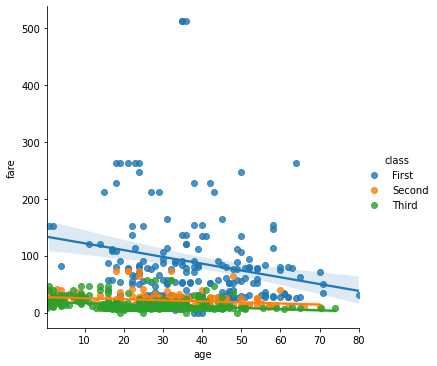

In [14]:
sns.lmplot(data=df, x="age", y="fare", hue="class")

## 14. age 와 fare 에 따른 상관계수를 구하고 결과를 df_corr 에 할당해 주세요.
그리고 df_corr 에 담긴값을 출력합니다.
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>age</th>
      <th>fare</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>age</th>
      <td>1.000000</td>
      <td>0.096067</td>
    </tr>
    <tr>
      <th>fare</th>
      <td>0.096067</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>

In [15]:
df_corr = df[["age", "fare"]].corr()
df_corr

,age,fare
age,1.000000,0.096067
fare,0.096067,1.000000


## 15. 위에서 만든 상관계수를 heatmap 으로 표현해 주세요.
* annot=True 옵션으로 그래프에서 상관계수가 표시되도록 해주세요.

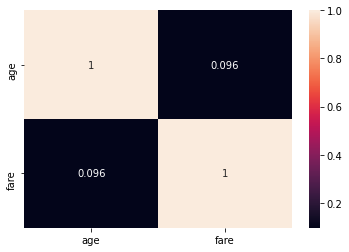

In [16]:
sns.heatmap(df_corr, annot=True)